## DATA PREPARATION

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("dataset.csv")
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
symptom_desc = pd.read_csv("symptom_Description.csv")
symptom_desc.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [5]:
symptom_precaution = pd.read_csv("symptom_precaution.csv")
symptom_precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [6]:
symptom_severity = pd.read_csv("Symptom-severity.csv")
symptom_severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [8]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [9]:
symptom_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes


In [10]:
symptom_precaution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       41 non-null     object
 1   Precaution_1  41 non-null     object
 2   Precaution_2  41 non-null     object
 3   Precaution_3  40 non-null     object
 4   Precaution_4  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


In [11]:
symptom_severity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


CEK NULL

In [12]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [13]:
symptom_desc.isnull().sum()

Disease        0
Description    0
dtype: int64

In [14]:
symptom_precaution.isnull().sum()

Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    1
Precaution_4    1
dtype: int64

In [15]:
symptom_severity.isnull().sum()

Symptom    0
weight     0
dtype: int64

In [16]:
import matplotlib.pyplot as plt

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\906731512.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette="viridis")


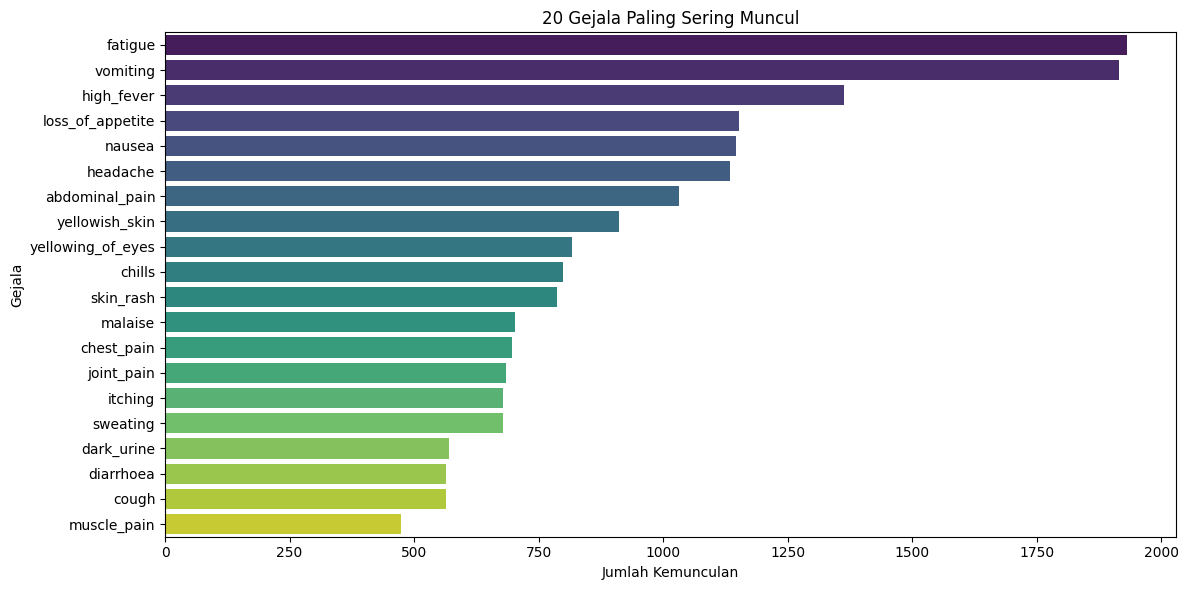

In [17]:
symptom_cols = [col for col in df.columns if 'Symptom' in col]

all_symptoms = df[symptom_cols].values.ravel()

all_symptoms = pd.Series(all_symptoms).dropna().astype(str).str.strip().str.lower().str.replace(' ', '_')

symptom_counts = all_symptoms.value_counts().head(20)  

plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette="viridis")
plt.title('20 Gejala Paling Sering Muncul')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Gejala')
plt.tight_layout()
plt.show()

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\2303506419.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='coolwarm')


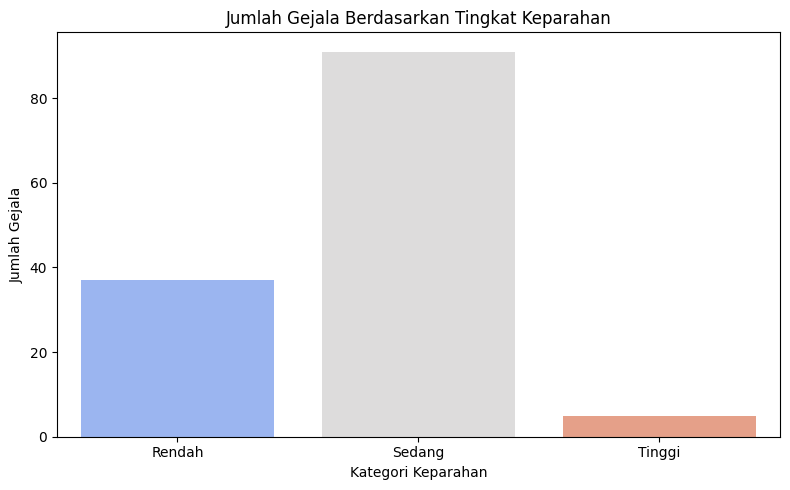

In [18]:
symptom_severity.columns = symptom_severity.columns.str.strip().str.lower()

def map_severity(weight):
    if weight <= 3:
        return 'Rendah'
    elif 4 <= weight <= 6:
        return 'Sedang'
    else:
        return 'Tinggi'

symptom_severity['kategori_keparahan'] = symptom_severity['weight'].apply(map_severity)

# Hitung jumlah gejala untuk setiap kategori
severity_counts = symptom_severity['kategori_keparahan'].value_counts().reindex(['Rendah', 'Sedang', 'Tinggi'])

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='coolwarm')
plt.title('Jumlah Gejala Berdasarkan Tingkat Keparahan')
plt.xlabel('Kategori Keparahan')
plt.ylabel('Jumlah Gejala')
plt.tight_layout()
plt.show()

Jumlah nilai yang hilang di setiap kolom kategorikal:
 - Symptom_4: 348 nilai hilang
 - Symptom_5: 1206 nilai hilang
 - Symptom_6: 1986 nilai hilang
 - Symptom_7: 2652 nilai hilang
 - Symptom_8: 2976 nilai hilang
 - Symptom_9: 3228 nilai hilang
 - Symptom_10: 3408 nilai hilang
 - Symptom_11: 3726 nilai hilang
 - Symptom_12: 4176 nilai hilang
 - Symptom_13: 4416 nilai hilang
 - Symptom_14: 4614 nilai hilang
 - Symptom_15: 4680 nilai hilang
 - Symptom_16: 4728 nilai hilang
 - Symptom_17: 4848 nilai hilang


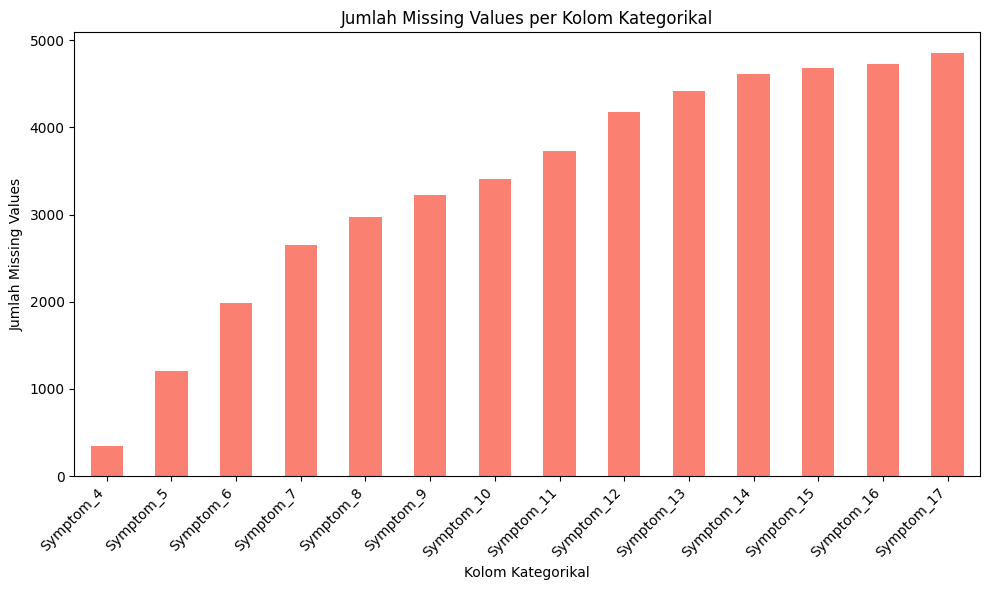


Persentase nilai yang hilang di kolom kategorikal:
 - Symptom_4: 7.07%
   >>> Symptom_4 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_5: 24.51%
   >>> Symptom_5 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_6: 40.37%
   >>> Symptom_6 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_7: 53.90%
   >>> Symptom_7 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_8: 60.49%
   >>> Symptom_8 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_9: 65.61%
   >>> Symptom_9 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_10: 69.27%
   >>> Symptom_10 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan

In [19]:
# --- Pastikan df Anda sudah terdefinisi ---
# Misalnya, jika df Anda adalah hasil dari pd.read_csv('nama_file_anda.csv')
# df = pd.read_csv('your_dataset.csv')
# Atau jika Anda menggunakannya dari sesi sebelumnya, pastikan df ada di scope

# 1. Pilih hanya kolom dengan tipe data 'object' (kategorikal)
categorical_columns = df.select_dtypes(include='object')

# 2. Hitung jumlah missing values untuk setiap kolom kategorikal
#    Ini akan menghasilkan Pandas Series
missing_values_categorical = categorical_columns.isnull().sum()

# Filter hanya kolom yang benar-benar memiliki missing values agar plot lebih rapi
missing_values_categorical = missing_values_categorical[missing_values_categorical > 0]

print("Jumlah nilai yang hilang di setiap kolom kategorikal:")
if not missing_values_categorical.empty:
    for col, count in missing_values_categorical.items():
        print(f" - {col}: {count} nilai hilang")
else:
    print("Tidak ada nilai hilang di kolom kategorikal.")

# --- Visualisasi Missing Values Kategorikal ---
if not missing_values_categorical.empty:
    plt.figure(figsize=(10, 6)) # Ukuran figure disesuaikan
    # Gunakan .plot(kind="bar") pada Pandas Series langsung
    missing_values_categorical.plot(kind="bar", color="salmon")
    plt.title("Jumlah Missing Values per Kolom Kategorikal")
    plt.ylabel("Jumlah Missing Values")
    plt.xlabel("Kolom Kategorikal")
    plt.xticks(rotation=45, ha='right') # Rotasi dan alignment agar nama kolom tidak tumpang tindih
    plt.tight_layout() # Menyesuaikan layout agar semua label terlihat
    plt.show()
else:
    print("\nTidak ada missing values untuk divisualisasikan di kolom kategorikal.")


# --- Analisis Persentase Missing Values Kategorikal ---
total_rows = len(df) # Jumlah total baris di DataFrame asli

if not missing_values_categorical.empty:
    # Hitung persentase missing values untuk kolom kategorikal
    missing_percent_categorical = (missing_values_categorical / total_rows) * 100

    print("\nPersentase nilai yang hilang di kolom kategorikal:")
    for col in missing_percent_categorical.index:
        percent = missing_percent_categorical[col]
        print(f" - {col}: {percent:.2f}%") # Format 2 angka di belakang koma

        if percent >= 80:
            print(f"   >>> {col} memiliki lebih dari 80% nilai kosong. Menghapus kolom ini mungkin lebih baik daripada imputasi.\n")
        else: # Termasuk 0% missing, atau di bawah 80%
            print(f"   >>> {col} memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.\n")
else:
    print("\nTidak ada kolom kategorikal dengan nilai yang hilang untuk dianalisis persentasenya.")

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


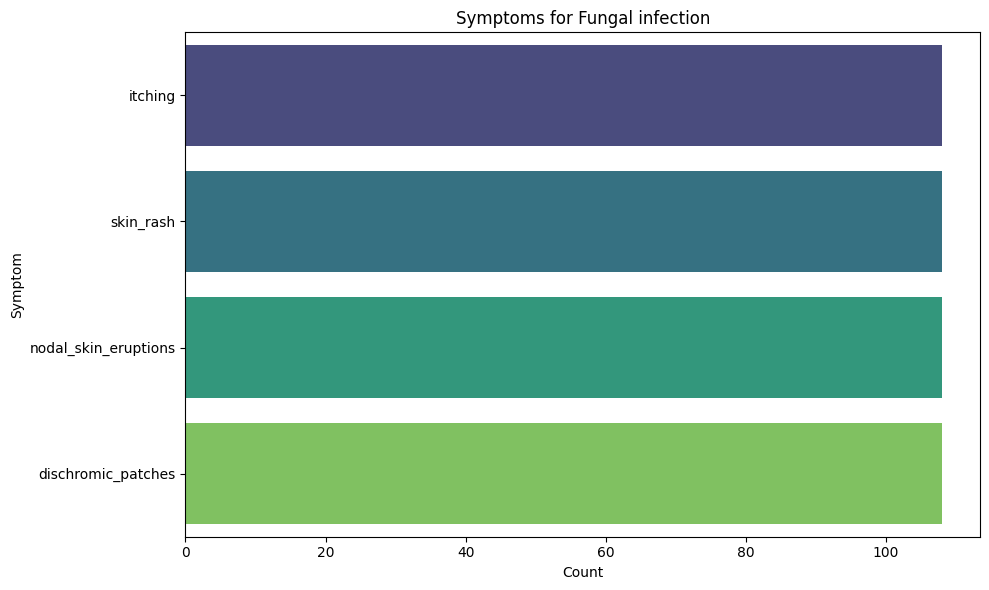

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


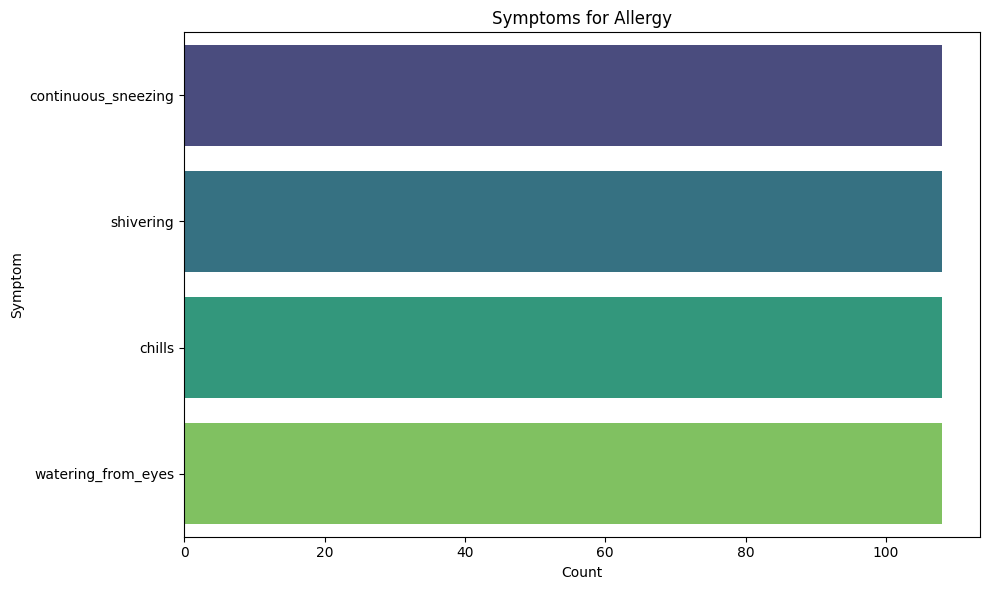

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


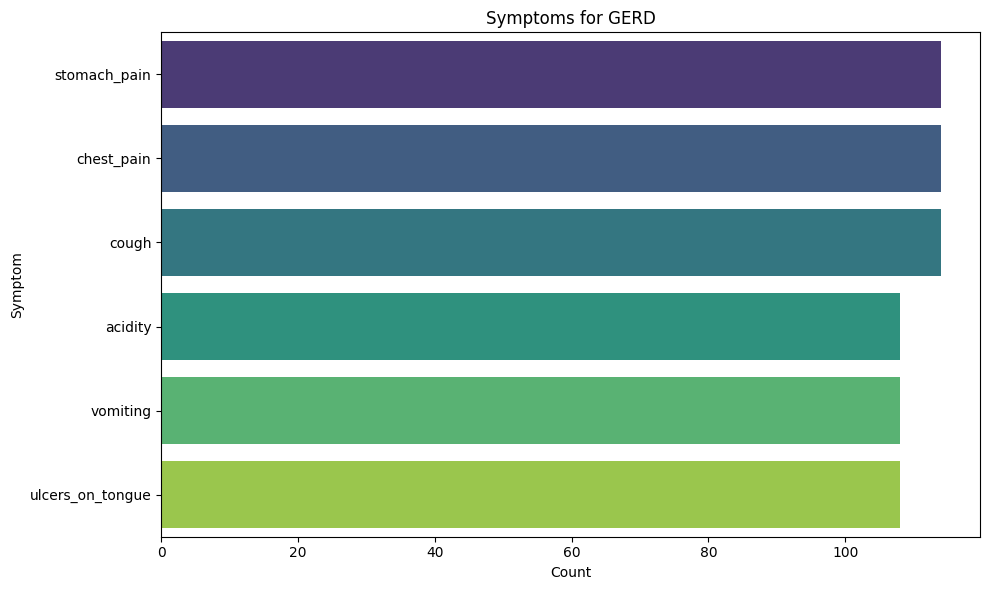

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


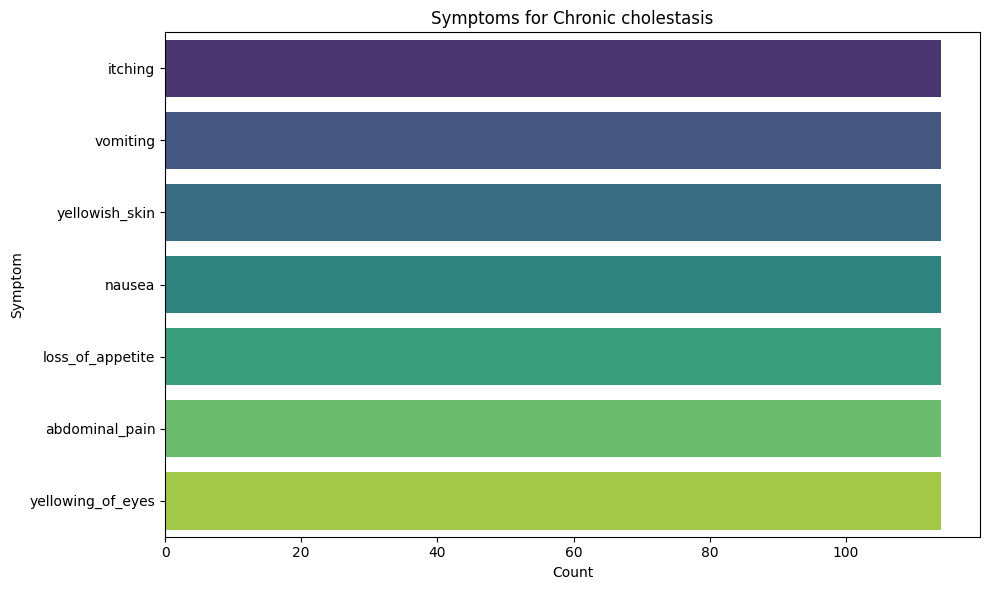

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


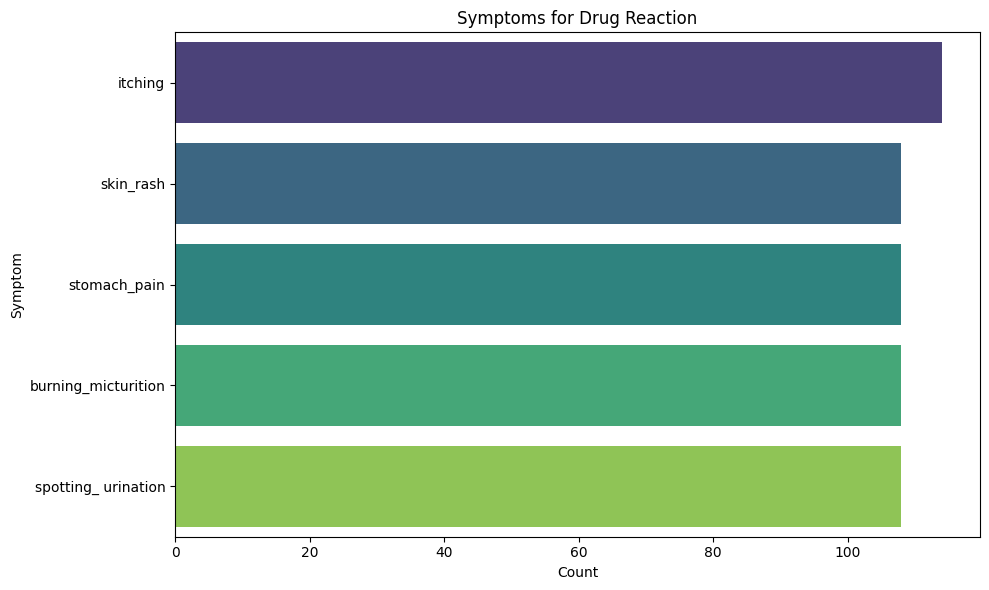

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


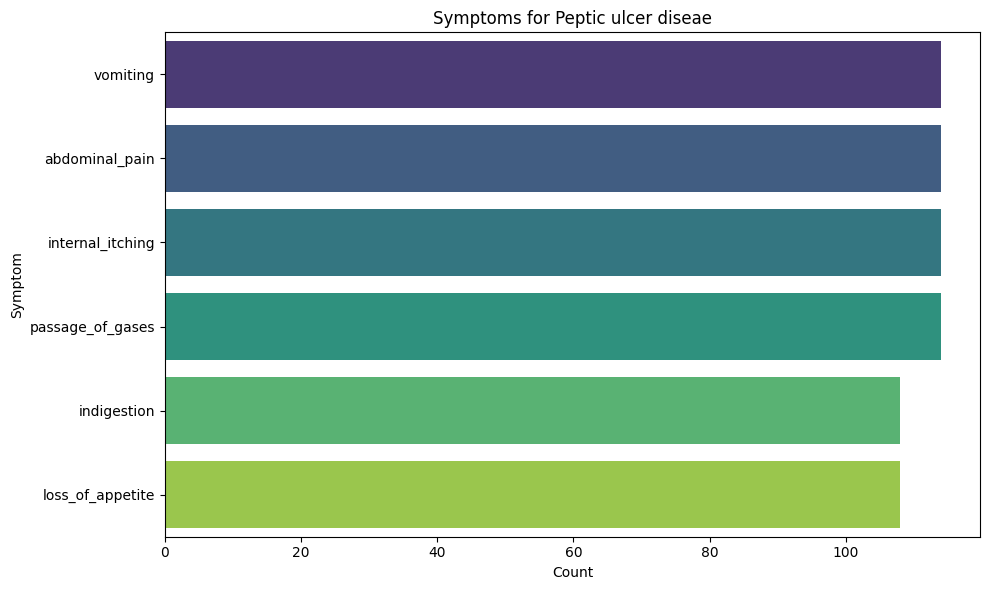

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


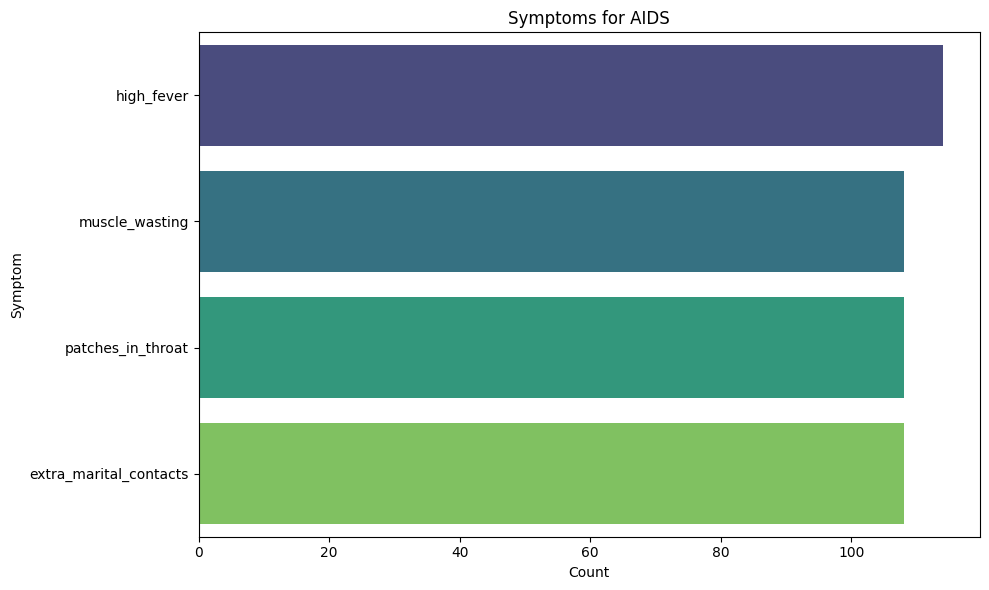

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


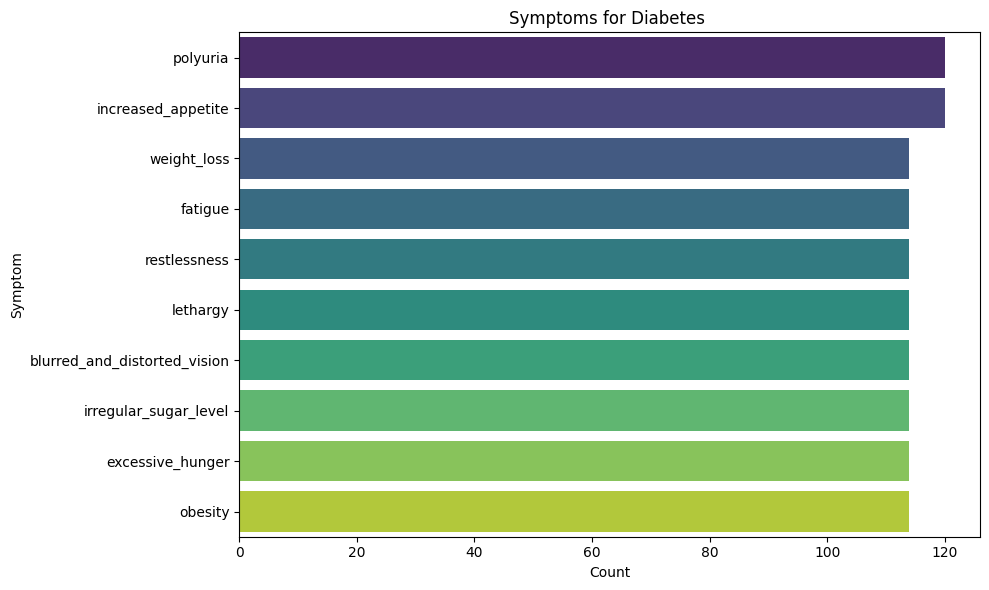

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


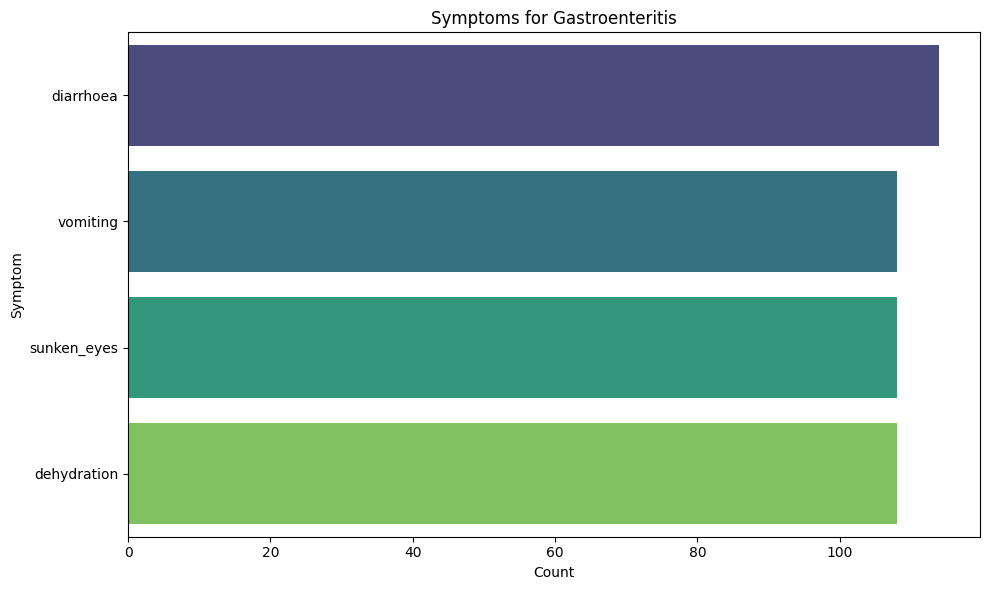

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


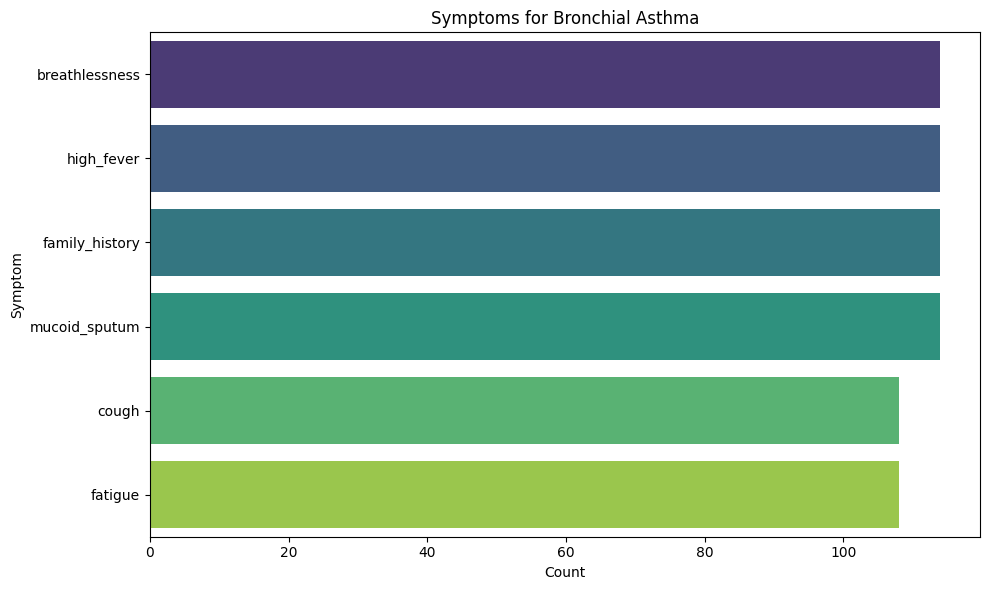

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


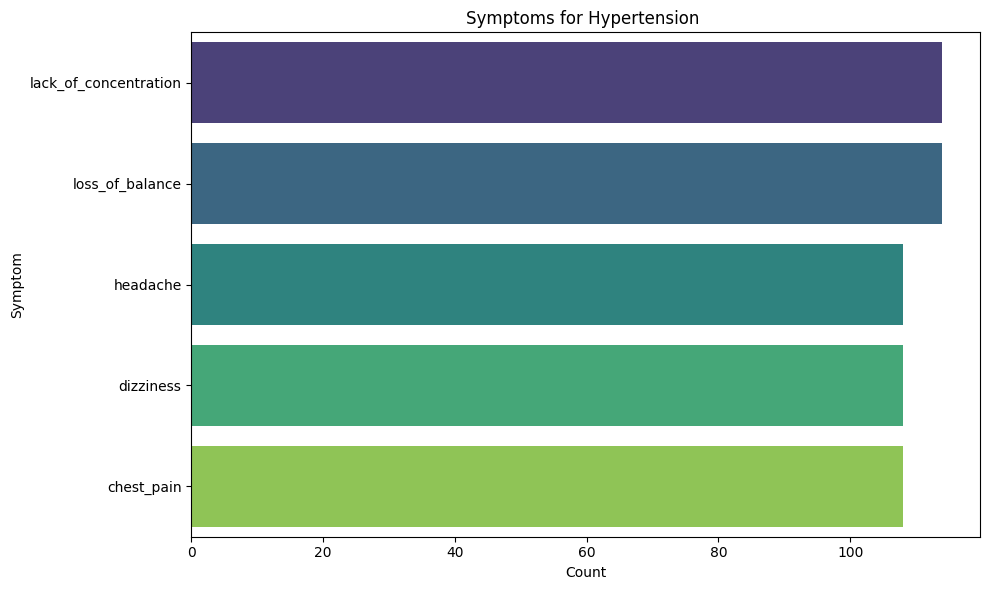

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


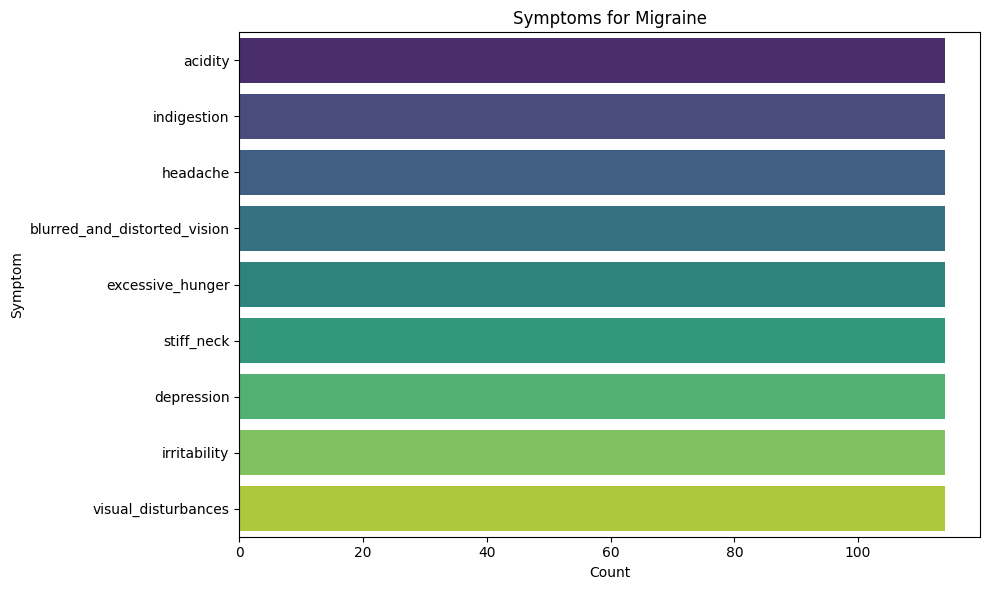

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


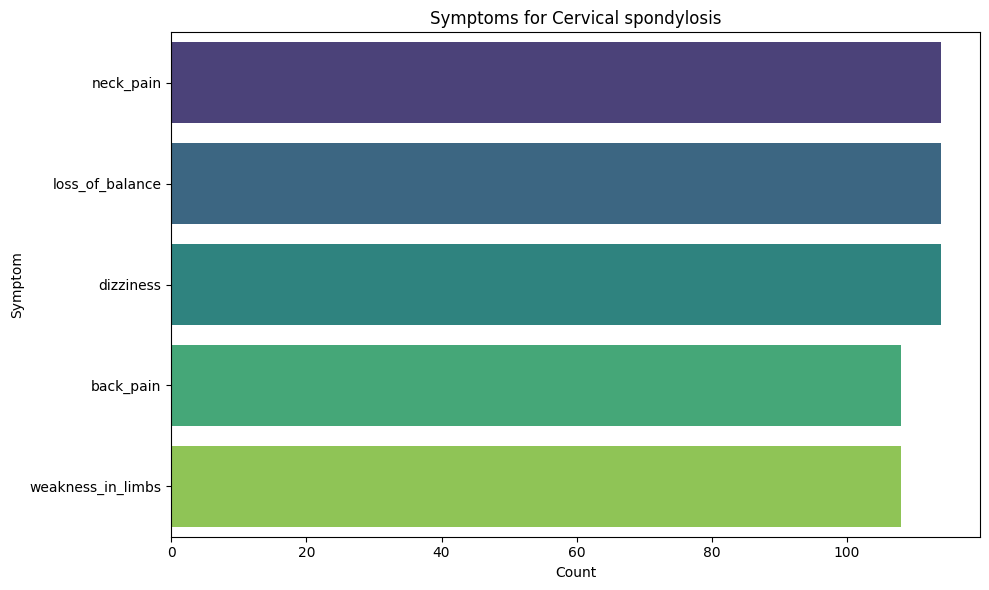

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


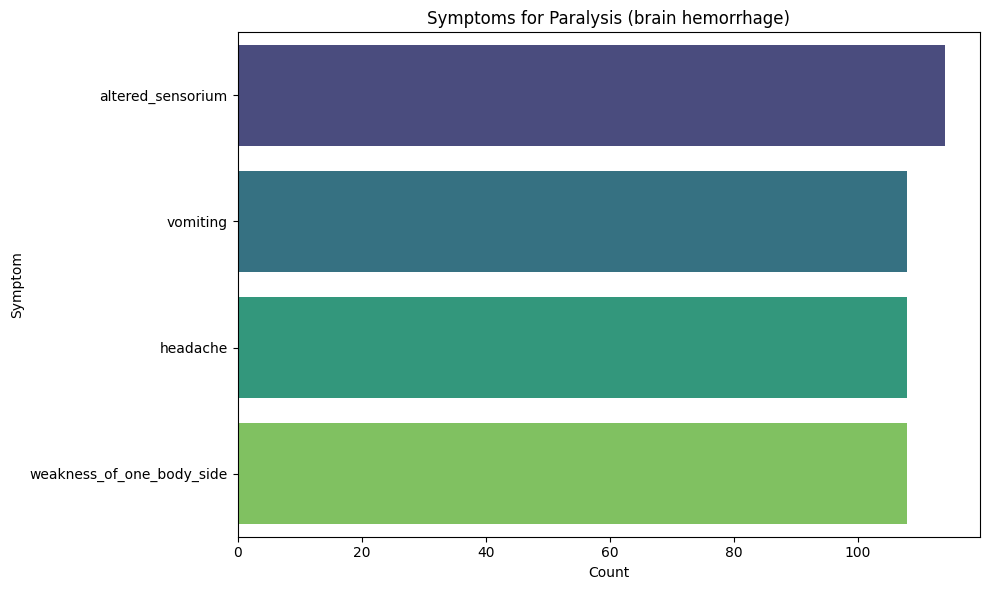

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


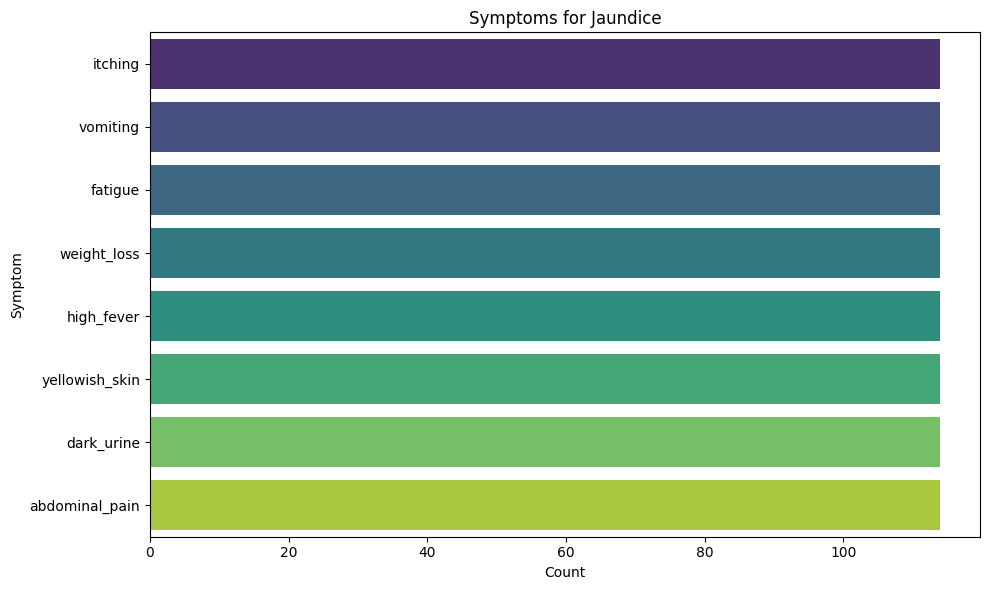

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


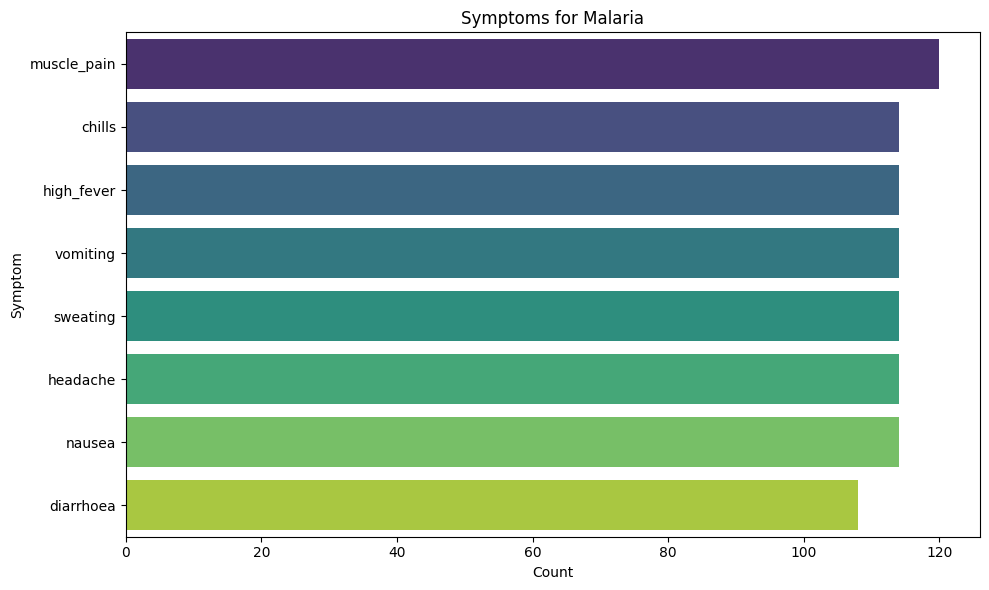

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


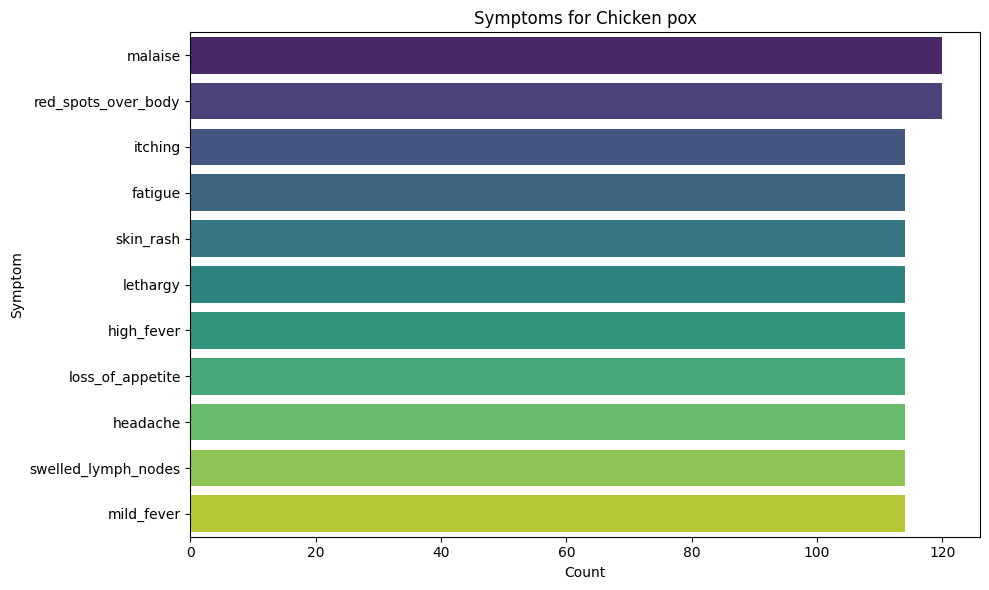

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


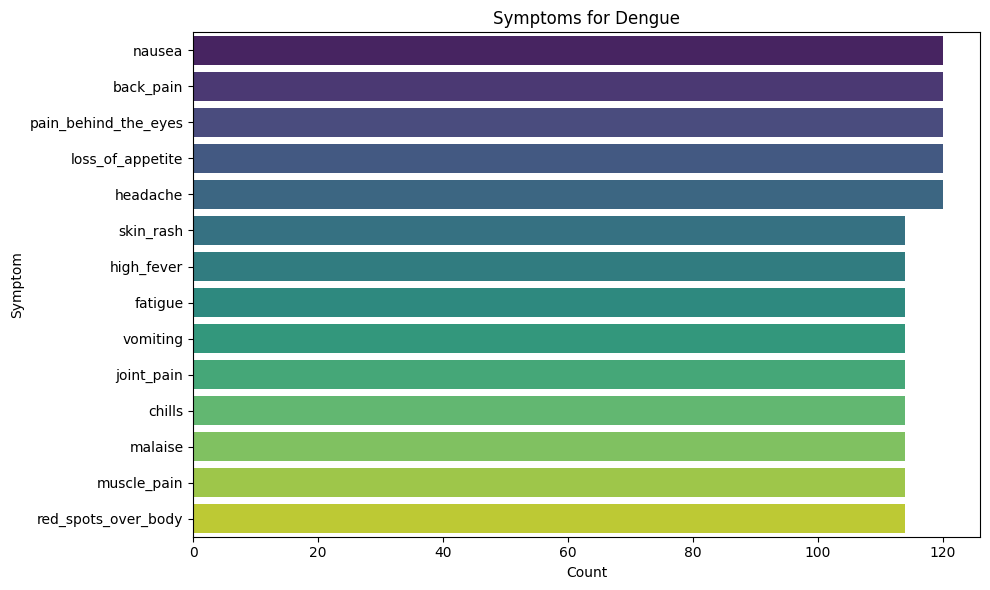

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


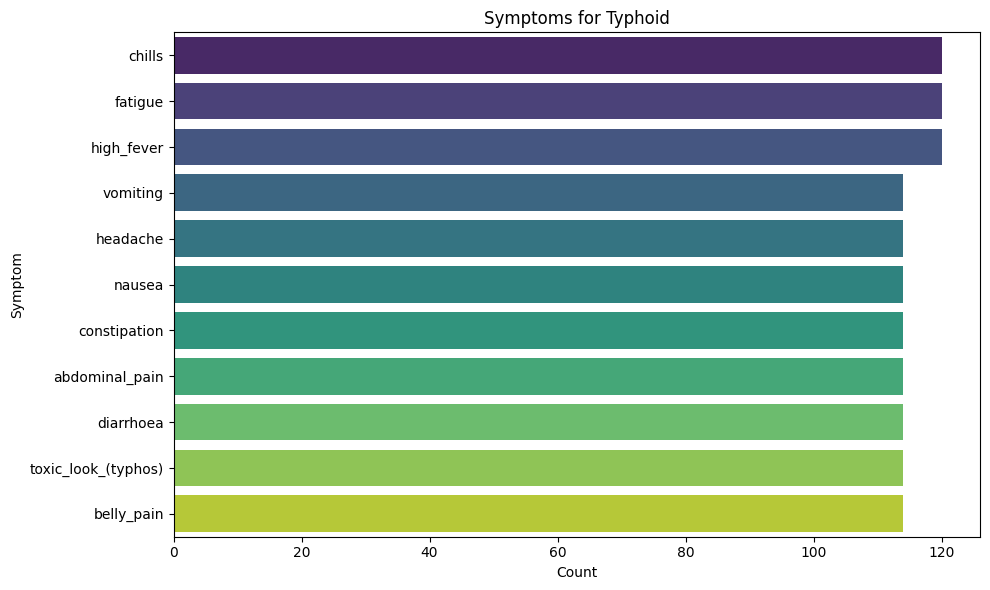

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


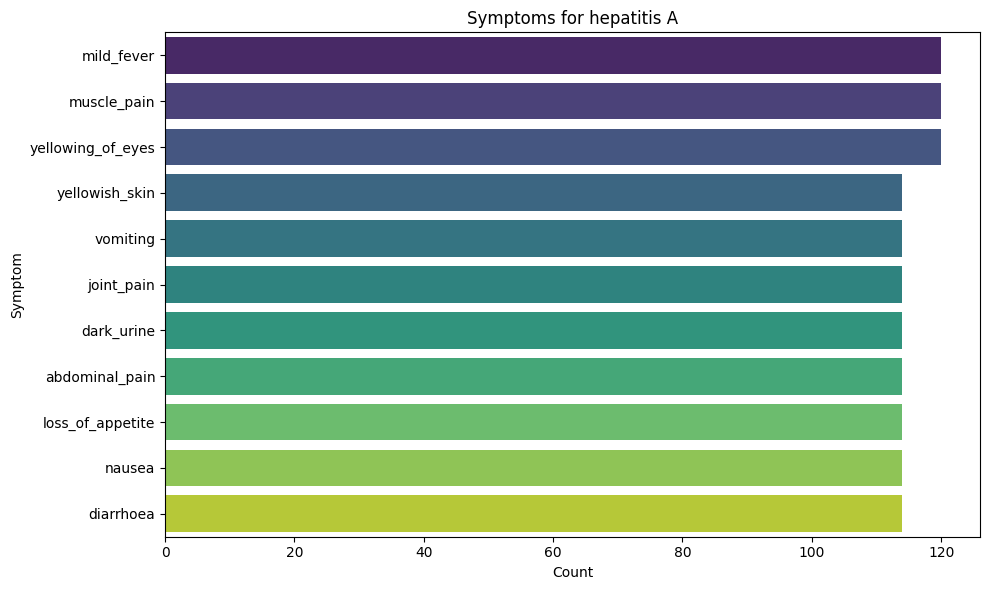

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


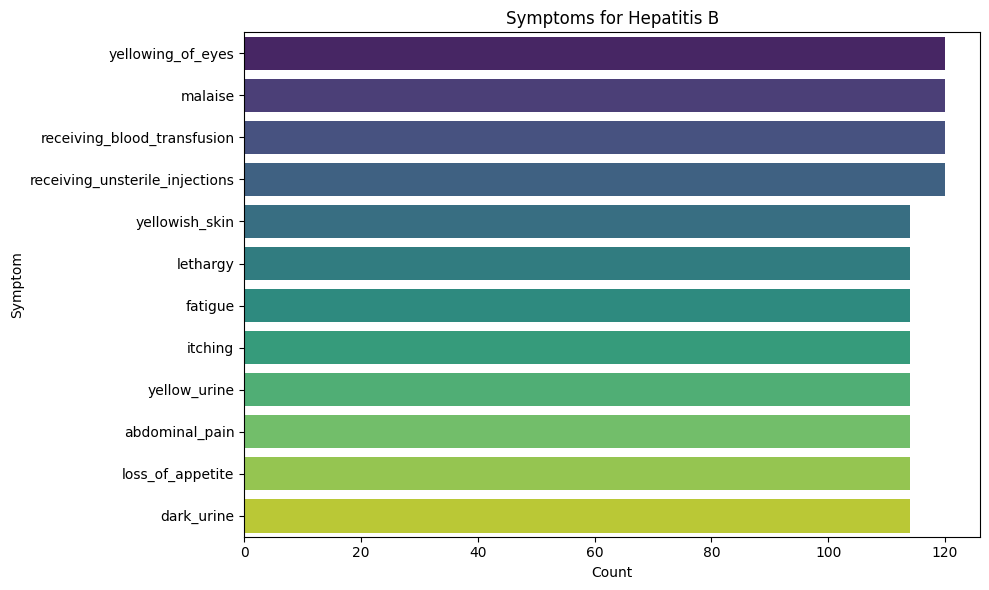

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


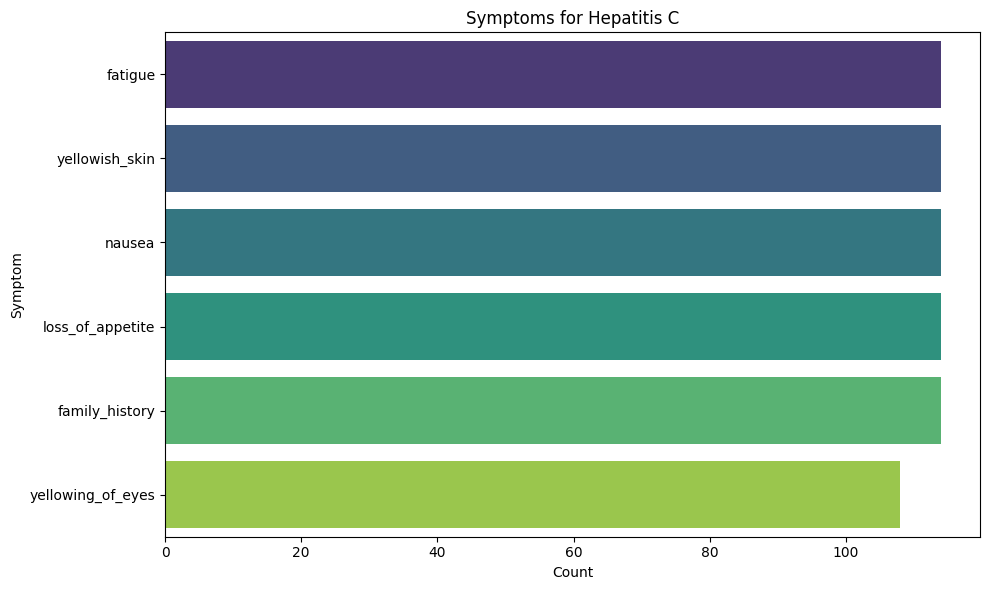

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


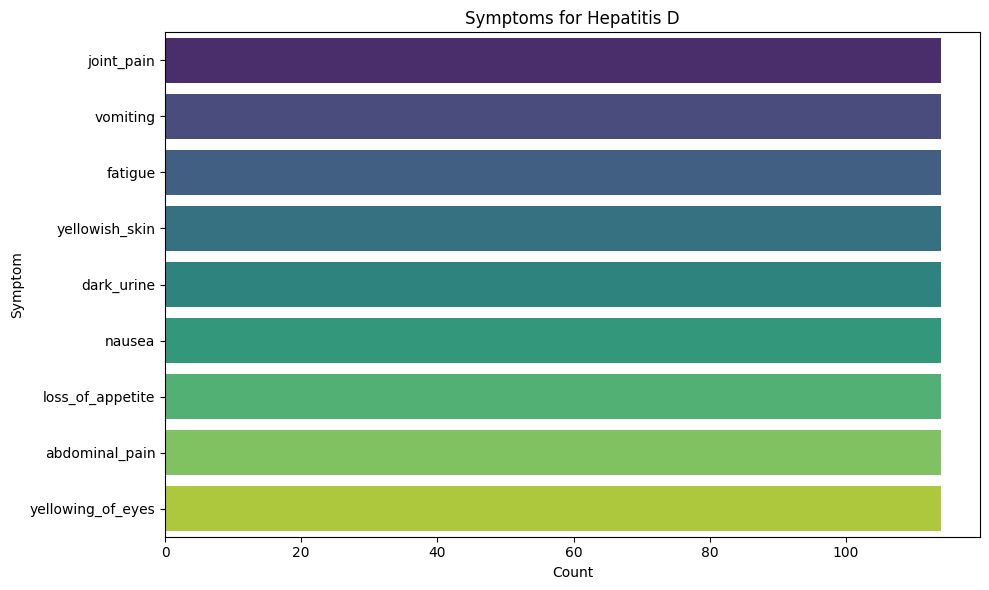

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


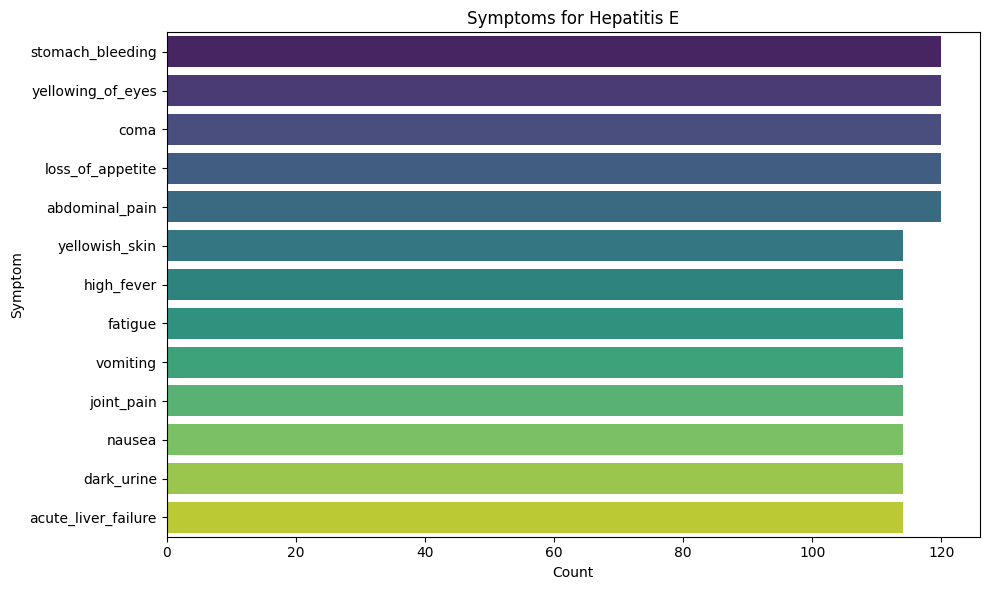

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


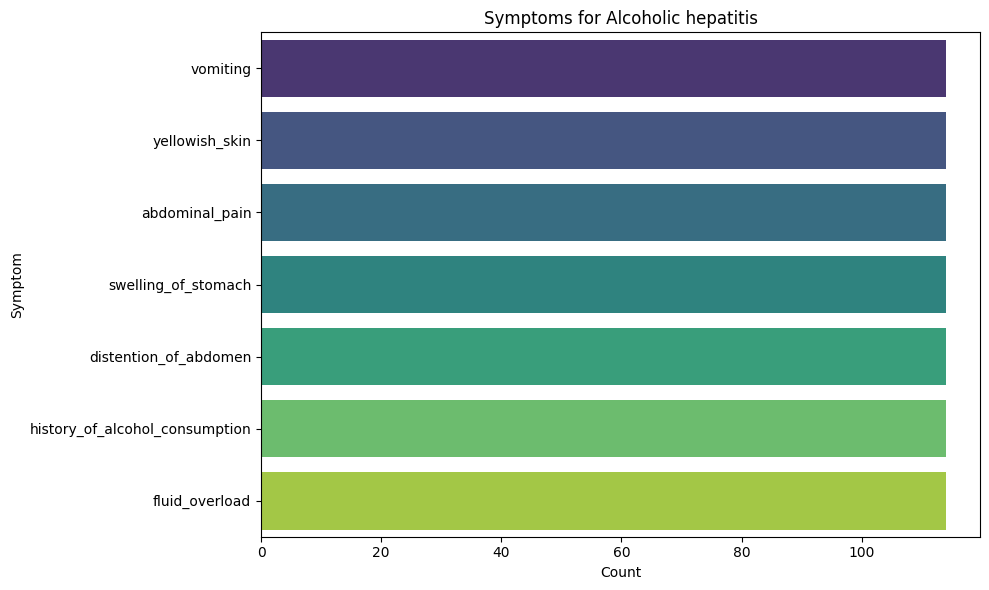

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


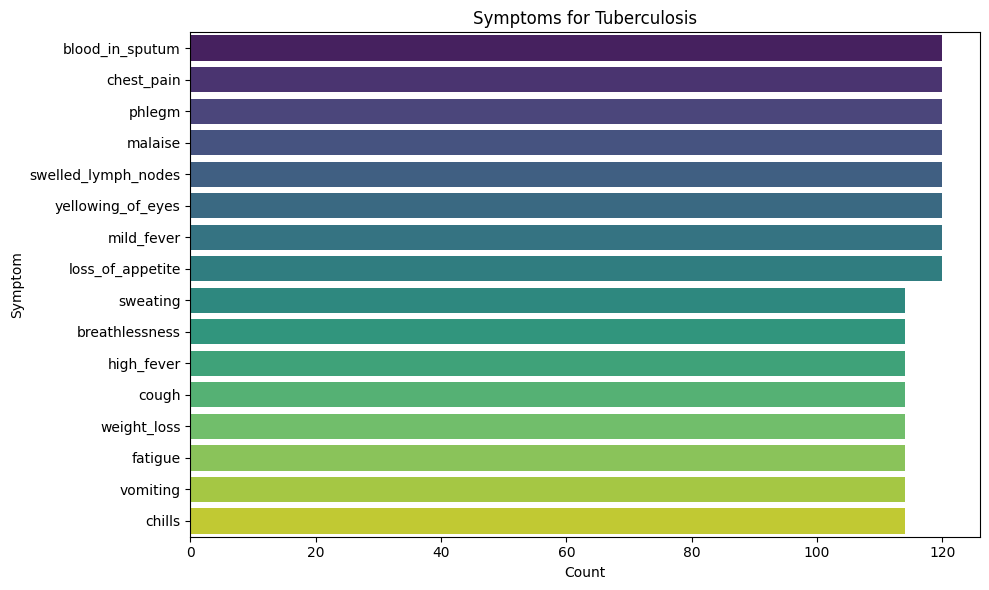

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


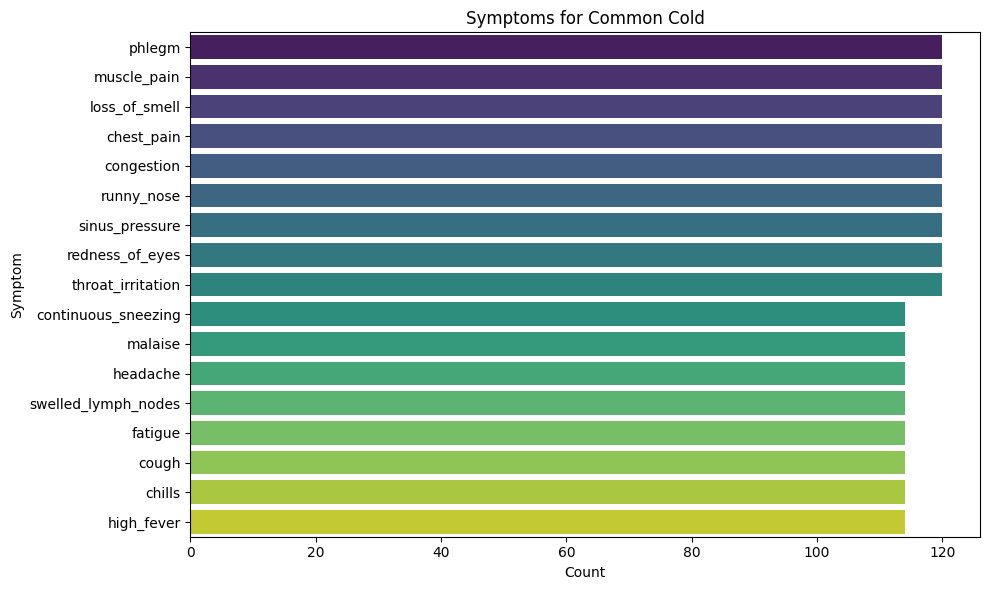

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


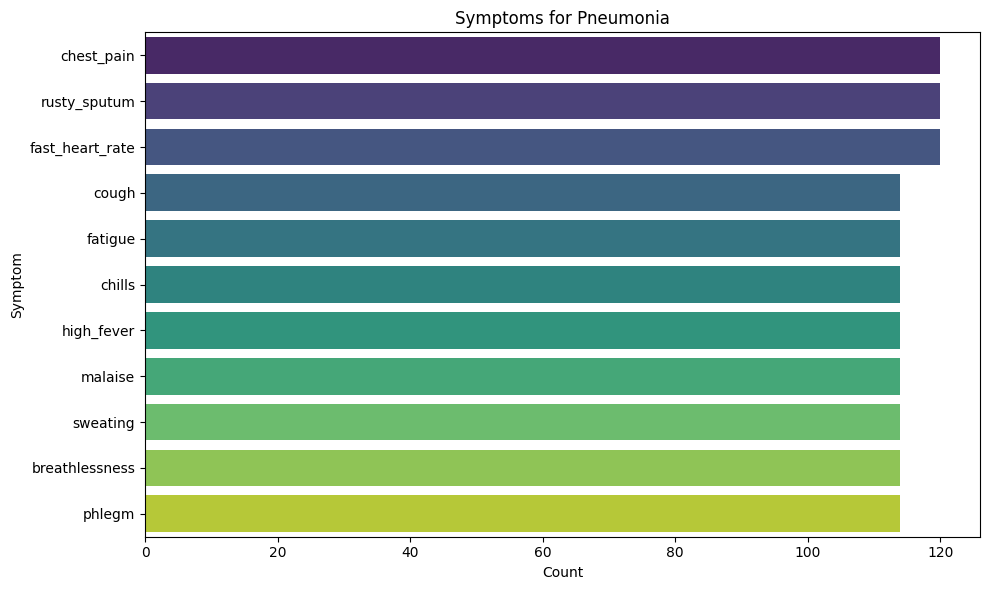

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


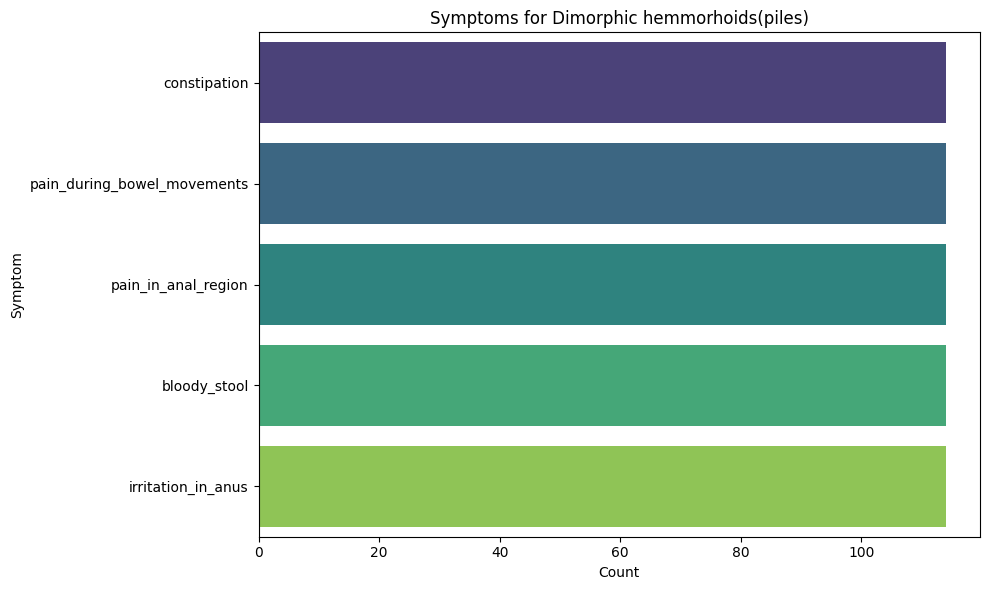

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


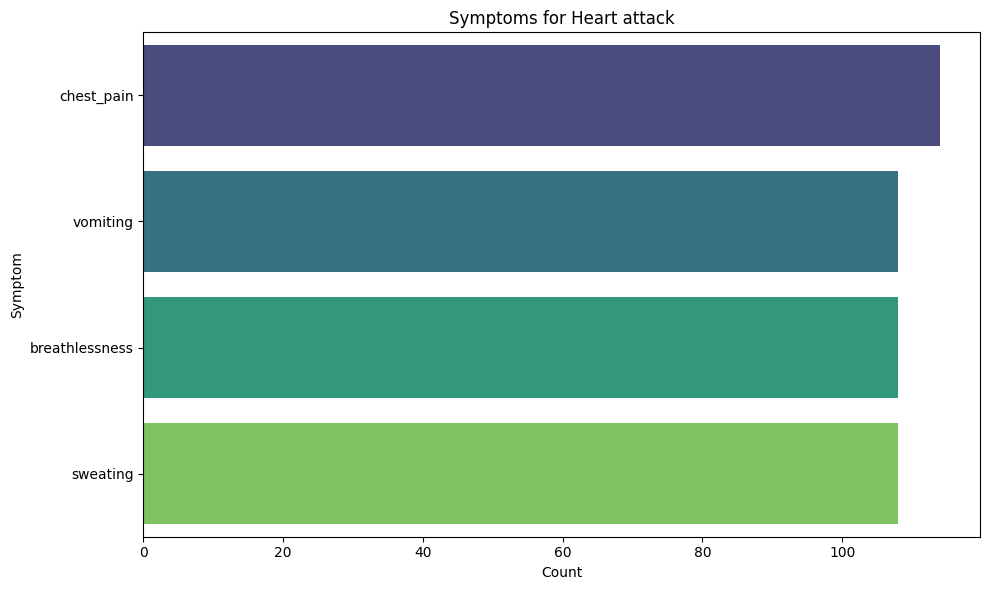

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


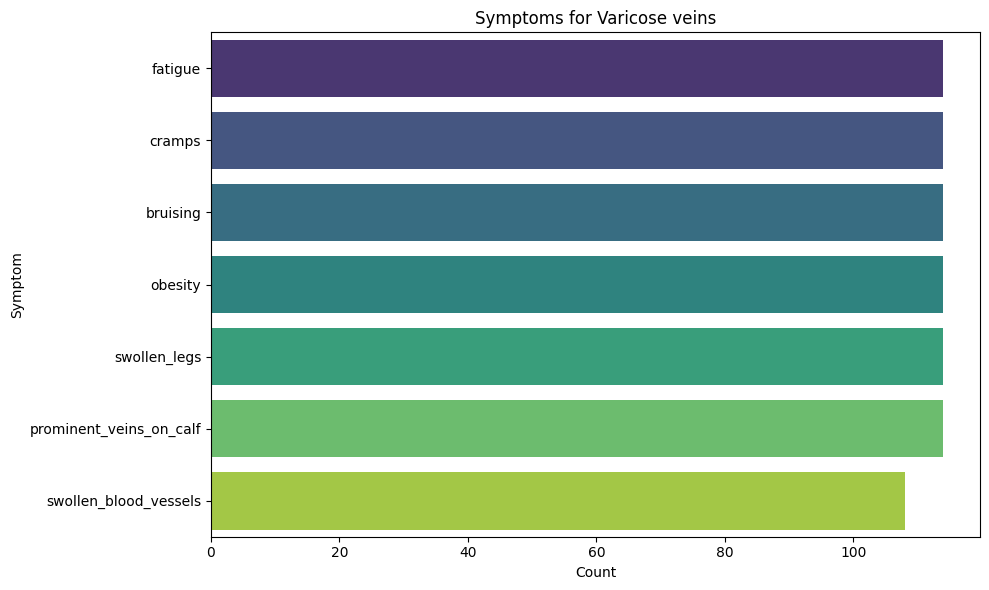

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


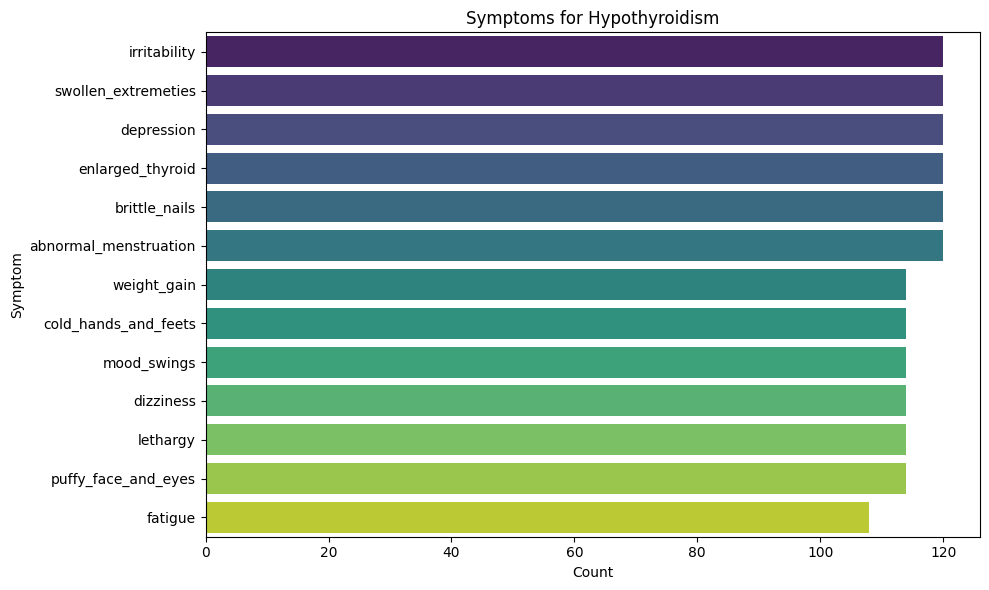

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


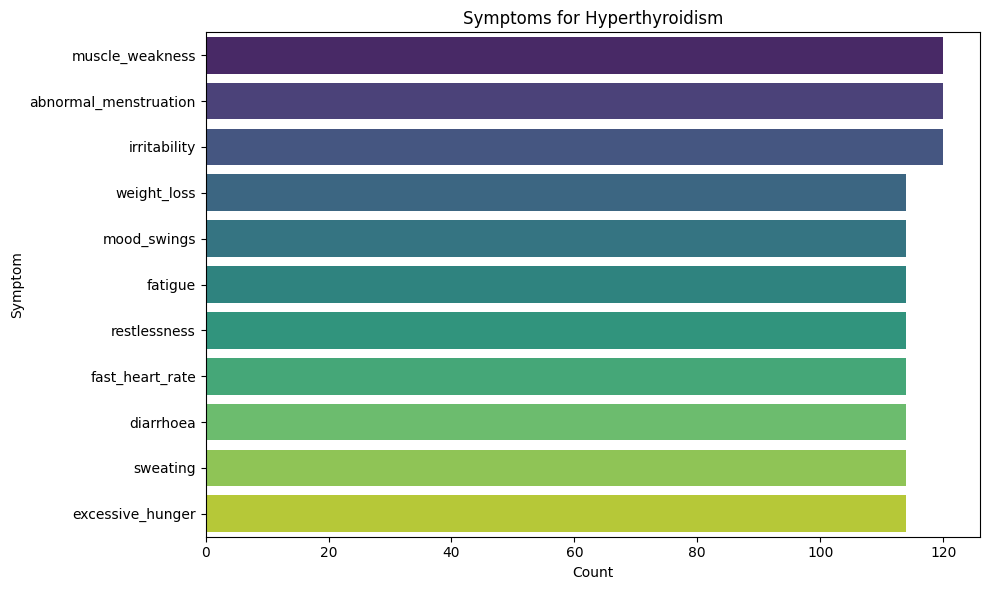

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


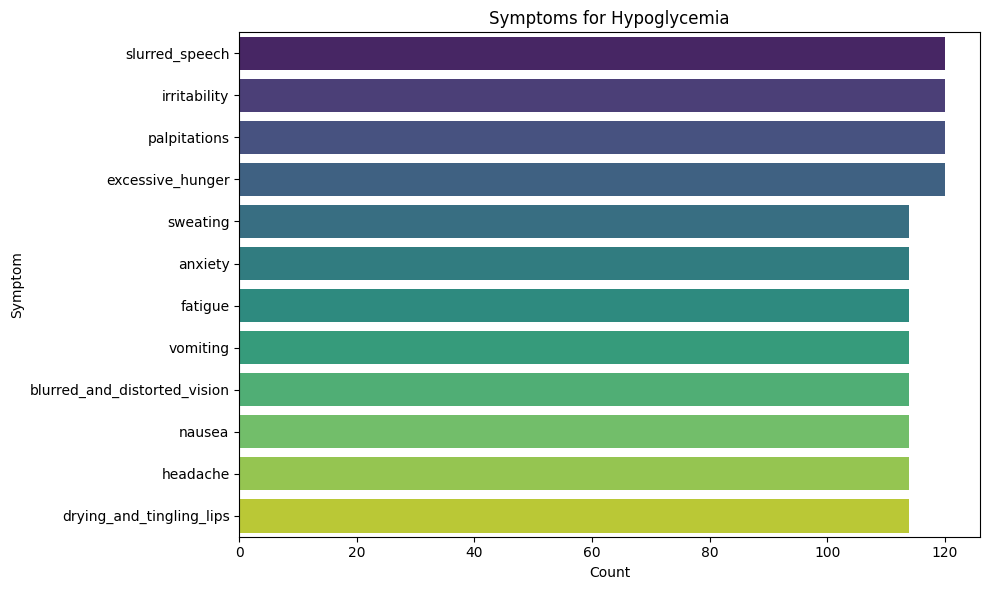

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


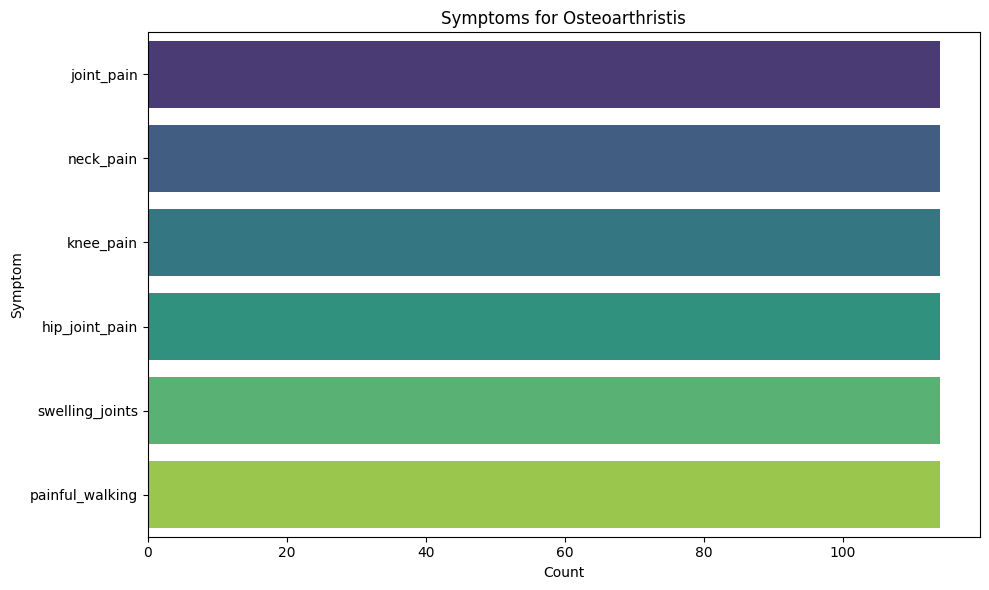

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


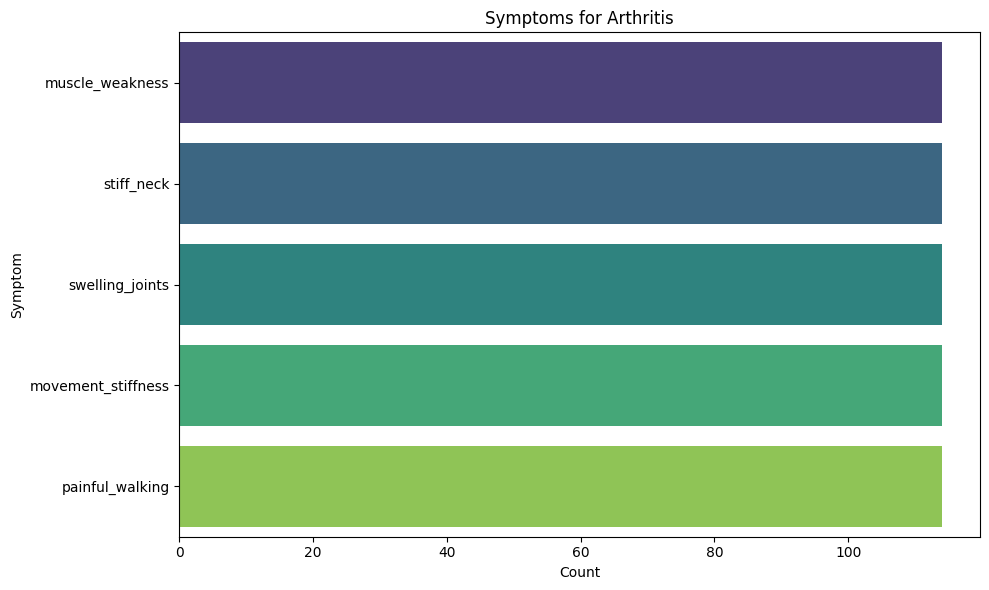

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


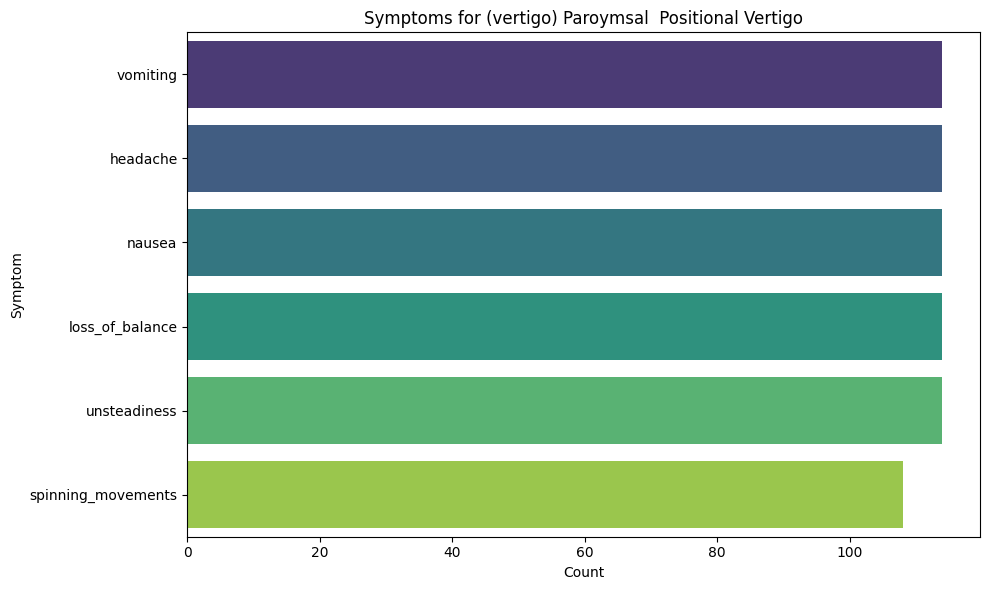

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


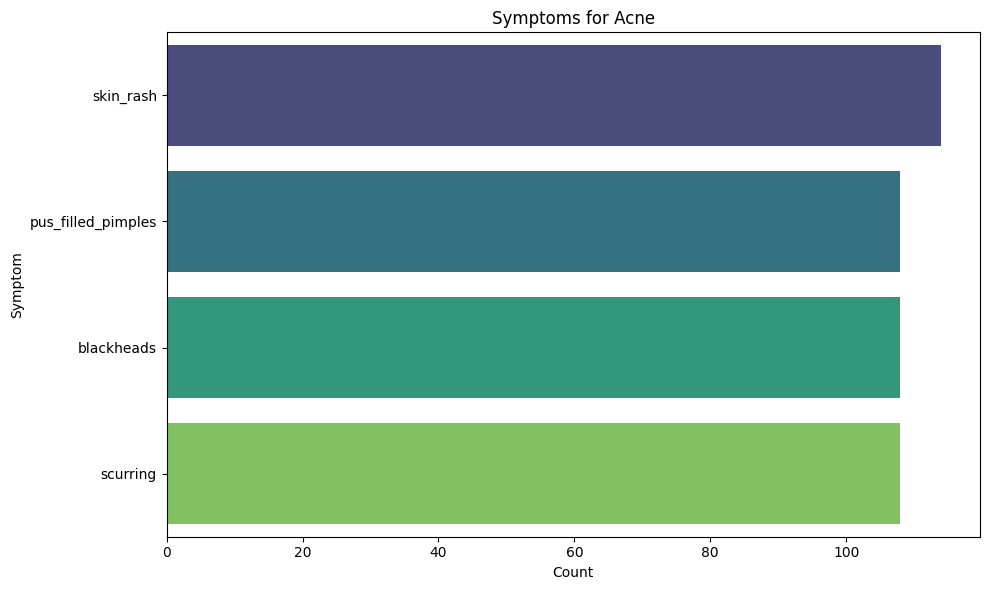

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


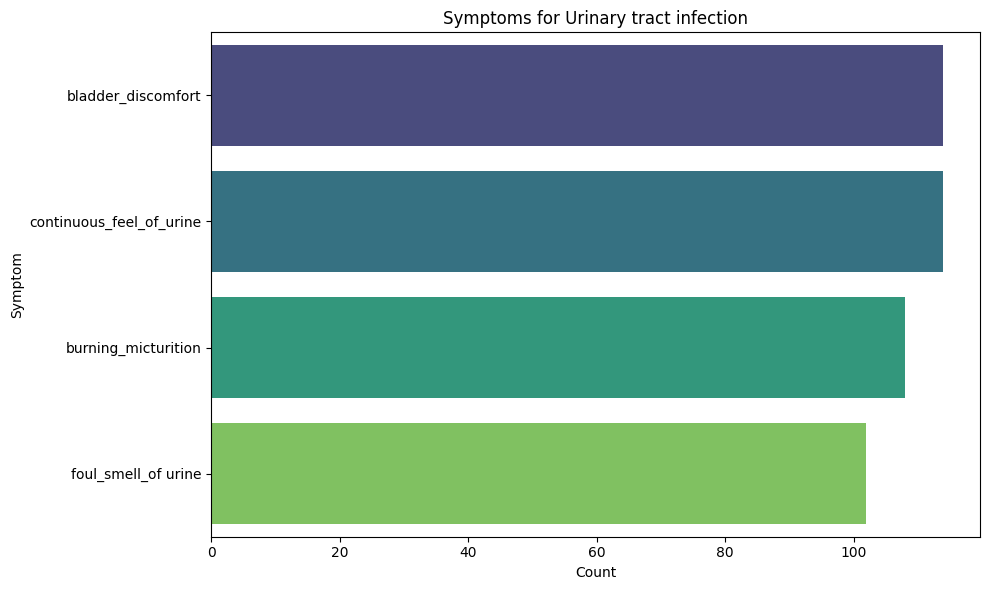

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


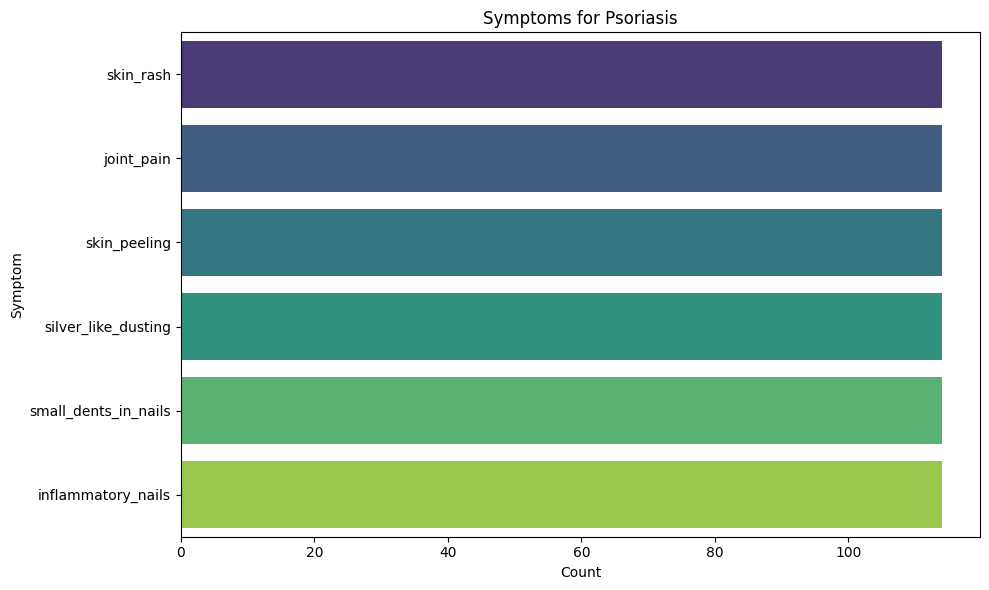

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


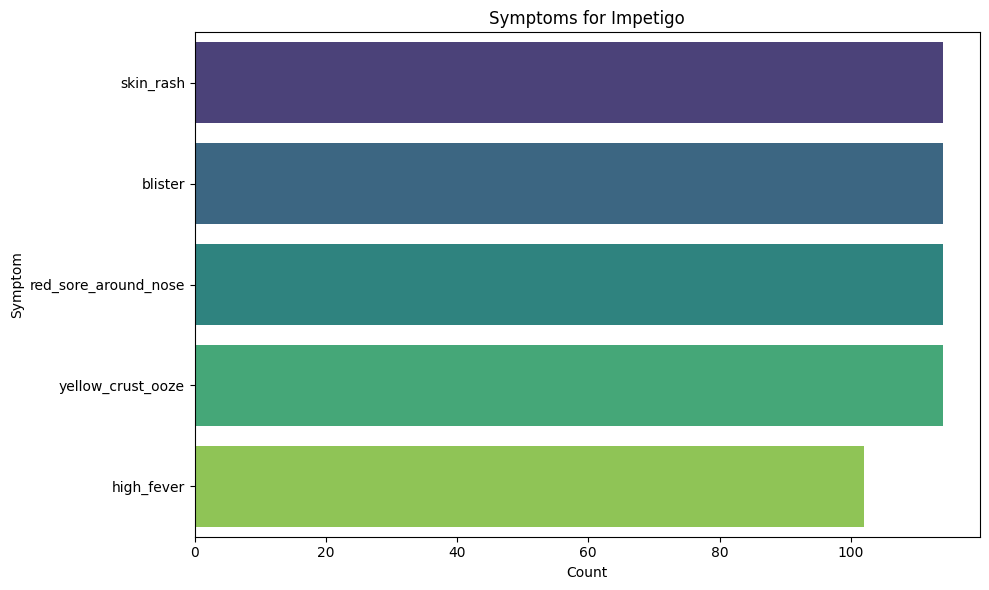

In [20]:
# Membaca file CSV ke dalam DataFrame
df = pd.read_csv('dataset.csv')

# Mendapatkan nama penyakit unik
unique_diseases = df['Disease'].unique()

# Mengidentifikasi kolom gejala
symptom_columns = [col for col in df.columns if 'Symptom' in col]

# Melakukan perulangan untuk setiap penyakit unik dan membuat plot
for disease_name in unique_diseases:
    # Memfilter data untuk penyakit saat ini
    disease_df = df[df['Disease'] == disease_name]

    # Mengubah DataFrame untuk mengubah kolom gejala menjadi baris
    # Menghilangkan baris di mana 'value' (gejala) adalah NaN setelah diubah.
    disease_symptoms = disease_df[symptom_columns].melt(var_name='Symptom_Column', value_name='Symptom_Name').dropna(subset=['Symptom_Name'])

    # Menghitung kemunculan setiap gejala
    symptom_counts = disease_symptoms['Symptom_Name'].value_counts().reset_index()
    symptom_counts.columns = ['Symptom', 'Count']

    # Mengurutkan untuk visualisasi yang lebih baik
    symptom_counts = symptom_counts.sort_values(by='Count', ascending=False)

    # Membuat plot bar untuk gejala penyakit saat ini
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')
    plt.title(f'Symptoms for {disease_name}')
    plt.xlabel('Count')
    plt.ylabel('Symptom')
    plt.tight_layout()
    plt.show()

In [21]:
symptom_precaution['Disease'] = symptom_precaution['Disease'].str.strip().str.lower()
symptom_desc['Disease'] = symptom_desc['Disease'].str.strip().str.lower()

df_combined = symptom_desc.merge(symptom_precaution, on='Disease', how='outer')

df_combined.head()

,Disease,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,(vertigo) paroymsal positional vertigo,Benign paroxysmal positional vertigo (BPPV) is...,lie down,avoid sudden change in body,avoid abrupt head movment,relax
1,acne,"Acne vulgaris is the formation of comedones, p...",bath twice,avoid fatty spicy food,drink plenty of water,avoid too many products
2,aids,Acquired immunodeficiency syndrome (AIDS) is a...,avoid open cuts,wear ppe if possible,consult doctor,follow up
3,alcoholic hepatitis,"Alcoholic hepatitis is a diseased, inflammator...",stop alcohol consumption,consult doctor,medication,follow up
4,allergy,An allergy is an immune system response to a f...,apply calamine,cover area with bandage,NaN,use ice to compress itching


## DROP COLUMN

In [22]:
df.drop(['Symptom_12','Symptom_13','Symptom_14','Symptom_15','Symptom_16','Symptom_17'], inplace=True,axis=1)

In [23]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
dtypes: object(12)
memory usage: 461.4+ KB


In [25]:
kolom = ['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']
for i in kolom:
    df[i].fillna('Unknown', inplace=True)

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\1440100058.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna('Unknown', inplace=True)


In [26]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,Fungal infection,itching,skin_rash,dischromic_patches,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [27]:
symptom_cols = [col for col in df.columns if 'Symptom' in col]
for col in symptom_cols:
    df[col] = df[col].astype(str).str.strip().str.lower().str.replace(' ', '_')

def calculate_weighted_symptoms(row):
    symptoms = [s for s in row[symptom_cols] if pd.notna(s) and s != 'nan']
    weights = symptom_severity.set_index('symptom').to_dict()['weight']
    return sum(weights.get(symptom, 0) for symptom in symptoms)

df['severity_score'] = df.apply(calculate_weighted_symptoms, axis=1)

df[['Disease', 'severity_score']].head()

,Disease,severity_score
0,Fungal infection,14
1,Fungal infection,13
2,Fungal infection,11
3,Fungal infection,10
4,Fungal infection,8


C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_3596\882054483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=severity_by_disease, x='Disease', y='severity_score', palette='Reds_r')


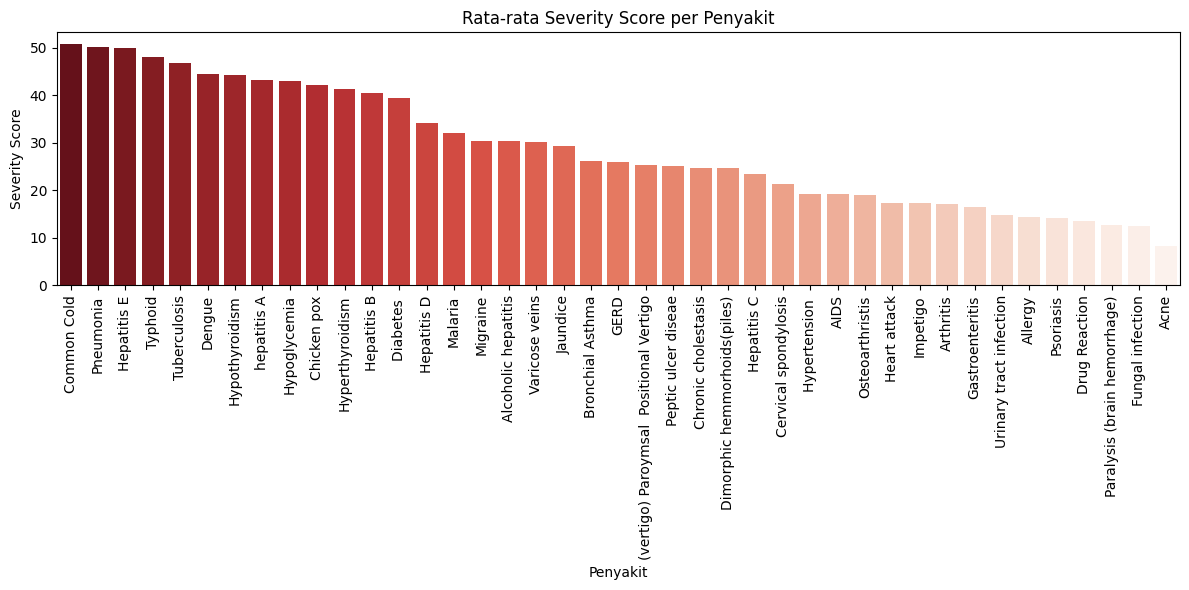

In [28]:
severity_by_disease = df.groupby('Disease')['severity_score'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=severity_by_disease, x='Disease', y='severity_score', palette='Reds_r')

plt.xticks(rotation=90)
plt.title('Rata-rata Severity Score per Penyakit')
plt.xlabel('Penyakit')
plt.ylabel('Severity Score')
plt.tight_layout()

plt.show()

## ENCODING

In [29]:
from sklearn.preprocessing import LabelEncoder

Disease = df['Disease'].unique()
Disease

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [30]:
len(Disease)

41

In [ ]:
columns = df.columns[1:-1] 
columns

Index(['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
       'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
       'Symptom_11'],
      dtype='object')

In [32]:
symptoms = [s for s in pd.unique(df[columns].values.ravel()) if str(s) != 'nan']
symptoms

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'dischromic_patches',
 'unknown',
 'continuous_sneezing',
 'shivering',
 'chills',
 'watering_from_eyes',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'vomiting',
 'cough',
 'chest_pain',
 'yellowish_skin',
 'nausea',
 'loss_of_appetite',
 'abdominal_pain',
 'yellowing_of_eyes',
 'burning_micturition',
 'spotting__urination',
 'passage_of_gases',
 'internal_itching',
 'indigestion',
 'muscle_wasting',
 'patches_in_throat',
 'high_fever',
 'extra_marital_contacts',
 'fatigue',
 'weight_loss',
 'restlessness',
 'lethargy',
 'irregular_sugar_level',
 'blurred_and_distorted_vision',
 'obesity',
 'excessive_hunger',
 'increased_appetite',
 'polyuria',
 'sunken_eyes',
 'dehydration',
 'diarrhoea',
 'breathlessness',
 'family_history',
 'mucoid_sputum',
 'headache',
 'dizziness',
 'loss_of_balance',
 'lack_of_concentration',
 'stiff_neck',
 'depression',
 'irritability',
 'visual_disturbances',
 'back_pain',
 'weakness_in_limbs',
 'nec

In [33]:
columns = df.columns[1:-1] #diperlukan -1 agar "severity_score" yang bertipe integer tidak termasuk 
symptoms = [s for s in pd.unique(df[columns].values.ravel()) if str(s) != 'nan']


In [34]:
has_nan_str = any(s.lower() == 'nan' for s in symptoms)
print(has_nan_str)

False


In [35]:
label_encoder = LabelEncoder()
symp = label_encoder.fit_transform(symptoms)
symp

array([ 53,  96,  70,  30, 114,  23,  92,  18, 118, 102,   2, 113, 117,
        24,  17, 126,  68,  58,   0, 125,  16, 100,  77,  49,  47,  66,
        78,  43,  36,  39, 122,  89,  57,  50,  12,  71,  35,  46,  80,
       103,  27,  29,  13,  37,  64,  42,  32,  59,  56, 101,  28,  51,
       116,   6, 119,  69, 120,   4,  26, 104,  65,  61, 105,  60,  87,
        54,  72,  21, 112,   7, 124,  84,  85,  20,   3, 107,  31,  45,
        40,  79, 111,  88,  94,  38,  90,  73,  74,  11,  52,  25,  15,
       110, 108,  81, 121,  19,  62,  82,  34,  14, 109,  67,   1,   5,
        97,  76,  33,  55,  44, 106,  75,  63,  99, 115,  83,   8,  91,
         9,  41,  22,  95,  93,  98,  48,  10,  86, 123])

In [36]:
encodedSymp = dict(zip(symptoms, symp))
encodedSymp

{'itching': np.int64(53),
 'skin_rash': np.int64(96),
 'nodal_skin_eruptions': np.int64(70),
 'dischromic_patches': np.int64(30),
 'unknown': np.int64(114),
 'continuous_sneezing': np.int64(23),
 'shivering': np.int64(92),
 'chills': np.int64(18),
 'watering_from_eyes': np.int64(118),
 'stomach_pain': np.int64(102),
 'acidity': np.int64(2),
 'ulcers_on_tongue': np.int64(113),
 'vomiting': np.int64(117),
 'cough': np.int64(24),
 'chest_pain': np.int64(17),
 'yellowish_skin': np.int64(126),
 'nausea': np.int64(68),
 'loss_of_appetite': np.int64(58),
 'abdominal_pain': np.int64(0),
 'yellowing_of_eyes': np.int64(125),
 'burning_micturition': np.int64(16),
 'spotting__urination': np.int64(100),
 'passage_of_gases': np.int64(77),
 'internal_itching': np.int64(49),
 'indigestion': np.int64(47),
 'muscle_wasting': np.int64(66),
 'patches_in_throat': np.int64(78),
 'high_fever': np.int64(43),
 'extra_marital_contacts': np.int64(36),
 'fatigue': np.int64(39),
 'weight_loss': np.int64(122),
 're

In [37]:
for col in columns:
    df[col] = df[col].map(encodedSymp)

In [38]:
Disease = df['Disease'].unique()
df['Disease'] = label_encoder.fit_transform(df['Disease'])

In [39]:
X = df.drop('Disease', axis=1)
y = df['Disease']

In [40]:
y

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: Disease, Length: 4920, dtype: int64

In [41]:
X

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,severity_score
0,53,96,70,30,114,114,114,114,114,114,114,14
1,96,70,30,114,114,114,114,114,114,114,114,13
2,53,70,30,114,114,114,114,114,114,114,114,11
3,53,96,30,114,114,114,114,114,114,114,114,10
4,53,96,70,114,114,114,114,114,114,114,114,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4915,117,42,68,99,59,115,114,114,114,114,114,27
4916,96,83,8,91,114,114,114,114,114,114,114,9
4917,16,9,41,22,114,114,114,114,114,114,114,16
4918,96,54,95,93,98,48,114,114,114,114,114,15


In [42]:
class_counts = y.value_counts()
print(class_counts)

Disease
15    120
4     120
16    120
9     120
14    120
33    120
1     120
12    120
17    120
6     120
23    120
30    120
7     120
32    120
28    120
29    120
8     120
11    120
37    120
40    120
19    120
20    120
21    120
22    120
3     120
36    120
10    120
34    120
13    120
18    120
39    120
26    120
24    120
25    120
31    120
5     120
0     120
2     120
38    120
35    120
27    120
Name: count, dtype: int64


In [43]:
# y = to_categorical(y, num_classes=len(df['Disease'].unique())) -> cb ini kan termasuk onehot, jd jan dipake deh, soalnya aku baca kalo si RandomForest itu gkperlu onehot. Justru kalo dia pake onehot bakal ngerusak datanya. Katanya pake LabelEncoder() aja udah cukup.

In [44]:
y.shape

(4920,)

## MODELING

In [45]:
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

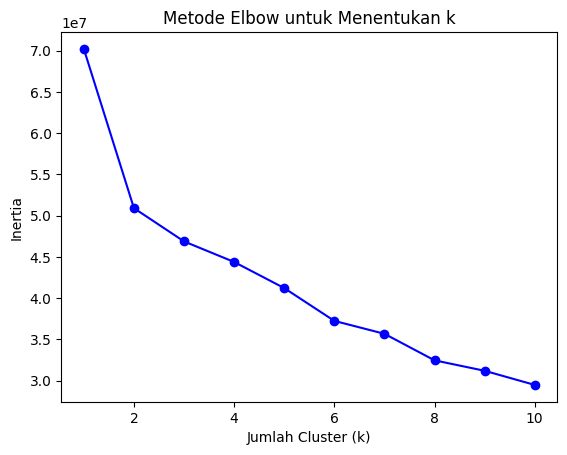

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k')
plt.show()

In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

df['cluster'] = clusters

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Disease         4920 non-null   int64
 1   Symptom_1       4920 non-null   int64
 2   Symptom_2       4920 non-null   int64
 3   Symptom_3       4920 non-null   int64
 4   Symptom_4       4920 non-null   int64
 5   Symptom_5       4920 non-null   int64
 6   Symptom_6       4920 non-null   int64
 7   Symptom_7       4920 non-null   int64
 8   Symptom_8       4920 non-null   int64
 9   Symptom_9       4920 non-null   int64
 10  Symptom_10      4920 non-null   int64
 11  Symptom_11      4920 non-null   int64
 12  severity_score  4920 non-null   int64
 13  cluster         4920 non-null   int32
dtypes: int32(1), int64(13)
memory usage: 519.0 KB


In [49]:
X_clustered = pd.DataFrame(X, columns=X.columns)
X_clustered['cluster'] = clusters

In [50]:
from sklearn.naive_bayes import GaussianNB

# Setelah data cleaning dan feature engineering (misal: setelah X_final & y siap)
X_train, X_test, y_train, y_test = train_test_split(X_clustered, y, test_size=0.3, random_state=42)

import sys
print(sys.executable)

!{sys.executable} -m pip install imbalanced-learn

In [53]:
from imblearn.over_sampling import SMOTE

print("Sebelum SMOTE:", y_train.value_counts())
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Setelah SMOTE:", pd.Series(y_train).value_counts())

Sebelum SMOTE: Disease
33    93
15    92
31    92
29    90
9     90
10    89
23    89
35    88
7     88
0     88
12    87
26    87
28    86
32    86
37    86
21    85
8     85
27    85
4     85
14    85
36    85
30    84
5     84
18    84
3     84
38    84
39    83
24    83
34    81
40    81
1     81
11    80
17    80
20    80
2     79
16    79
25    78
6     76
13    75
19    74
22    73
Name: count, dtype: int64
Setelah SMOTE: Disease
34    93
23    93
30    93
17    93
5     93
13    93
24    93
18    93
35    93
15    93
40    93
33    93
25    93
10    93
38    93
3     93
36    93
11    93
12    93
39    93
1     93
0     93
8     93
22    93
21    93
29    93
16    93
14    93
19    93
32    93
9     93
37    93
31    93
26    93
6     93
7     93
28    93
4     93
27    93
2     93
20    93
Name: count, dtype: int64


In [54]:
X_train

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,severity_score,cluster
0,18,39,24,43,13,104,60,79,17,38,90,52,0
1,18,39,24,43,13,104,60,79,17,38,90,52,0
2,42,17,32,59,56,114,114,114,114,114,114,21,1
3,2,47,42,12,35,101,28,51,116,114,114,32,0
4,117,103,27,29,114,114,114,114,114,114,114,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808,54,117,126,26,68,58,0,29,61,125,65,45,0
3809,54,117,126,26,68,58,0,61,125,65,114,39,0
3810,54,117,126,26,61,0,29,61,125,65,114,40,0
3811,54,117,126,26,68,58,0,29,61,125,65,45,0


In [55]:
X_test

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,severity_score,cluster
373,96,8,91,114,114,114,114,114,114,114,114,7,1
4916,96,83,8,91,114,114,114,114,114,114,114,9,1
1550,39,62,122,89,104,29,38,35,67,51,1,43,0
3081,66,78,43,36,114,114,114,114,114,114,114,21,1
3857,53,117,126,68,58,0,125,114,114,114,114,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,53,96,70,30,114,114,114,114,114,114,114,14,1
1694,117,47,0,77,49,114,114,114,114,114,114,23,1
4767,2,47,42,12,35,101,28,51,116,114,114,32,0
3721,39,121,19,62,57,32,82,34,14,109,28,45,0


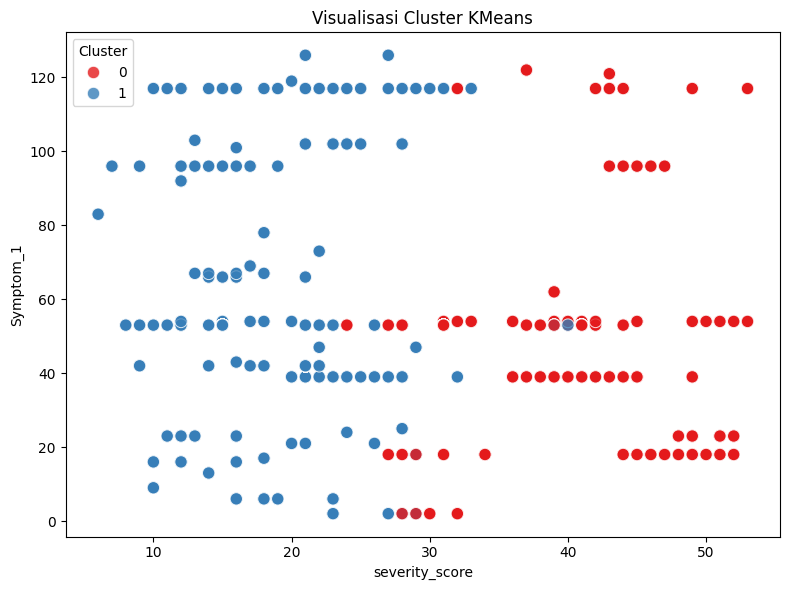

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih dua fitur untuk visualisasi (misal: severity_score dan fitur lain)
if 'severity_score' in X_clustered.columns:
    feature_x = 'severity_score'
else:
    feature_x = X_clustered.columns[0]

# Pilih fitur kedua yang bukan cluster dan bukan feature_x
feature_y = [col for col in X_clustered.columns if col not in [feature_x, 'cluster']][0]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=X_clustered,
    x=feature_x,
    y=feature_y,
    hue='cluster',
    palette='Set1',
    s=80,
    alpha=0.8
)
plt.title('Visualisasi Cluster KMeans')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [57]:
y_test.shape

(1476,)

In [58]:
y_train.shape

(3813,)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [60]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
import numpy as np

In [61]:
y_pred = model.predict(X_test)
y_prob = np.array(model.predict_proba(X_test))[:, 1]

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

Akurasi: 0.88


In [63]:
class_report = classification_report(y_test, y_pred)
print('Laporan Klasifikasi:')
print(class_report)

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       1.00      0.67      0.80        39
           2       1.00      1.00      1.00        41
           3       0.97      1.00      0.99        36
           4       0.48      0.97      0.64        35
           5       1.00      0.61      0.76        36
           6       1.00      0.77      0.87        44
           7       0.43      0.62      0.51        32
           8       1.00      1.00      1.00        35
           9       1.00      0.80      0.89        30
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        33
          13       1.00      0.80      0.89        45
          14       1.00      0.63      0.77        35
          15       0.51      0.86      0.64        28
          16       1.00      0.93      0.96        41
      

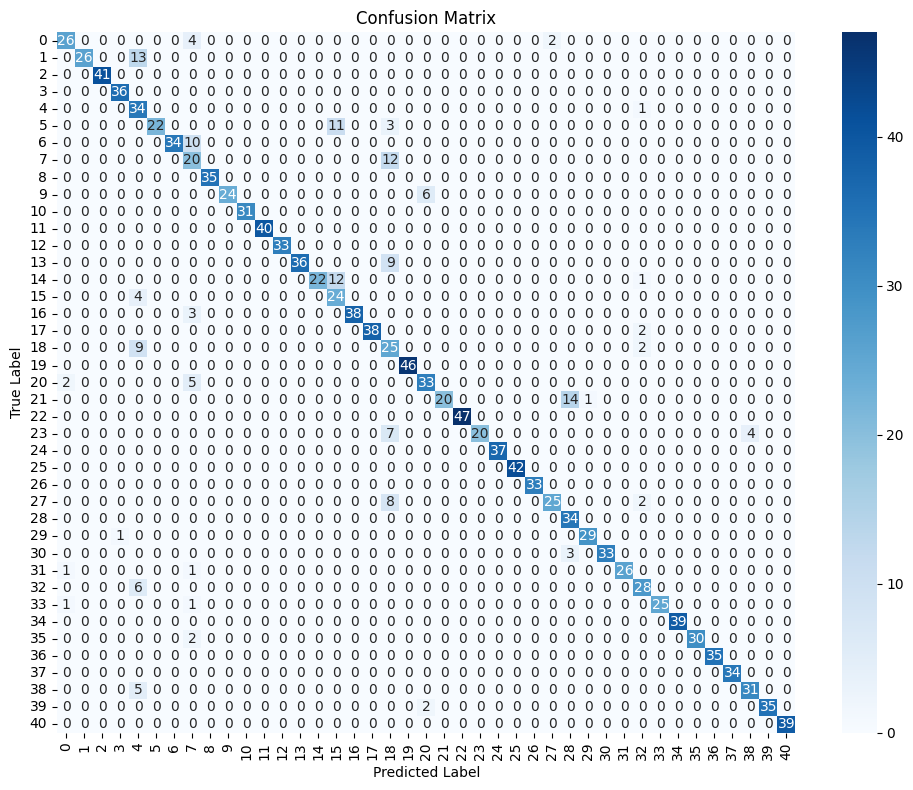

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

disease_encoder = LabelEncoder()
df['Disease'] = disease_encoder.fit_transform(df['Disease'])
disease_labels = list(disease_encoder.classes_)

if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_label = np.argmax(y_test, axis=1)
else:
    y_test_label = y_test

y_test_bin = label_binarize(y_test_label, classes=range(len(disease_labels)))
y_prob = np.array(model.predict_proba(X_test))
if y_prob.ndim == 3:
    y_prob = y_prob[:, :, 1]
    y_prob = y_prob.T

print("y_test_bin shape:", y_test_bin.shape)
print("y_prob shape:", y_prob.shape)

roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr', average='macro')
print(f"ROC AUC Score (macro average): {roc_auc:.2f}")


plt.figure(figsize=(8, 6))
for i in range(len(disease_labels)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, lw=1, label=f"{disease_labels[i]} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Multi-class")
plt.grid()
plt.tight_layout()
plt.show()

Akurasi Training: 0.88
Akurasi Test: 0.88
Model tidak menunjukkan indikasi overfitting yang signifikan


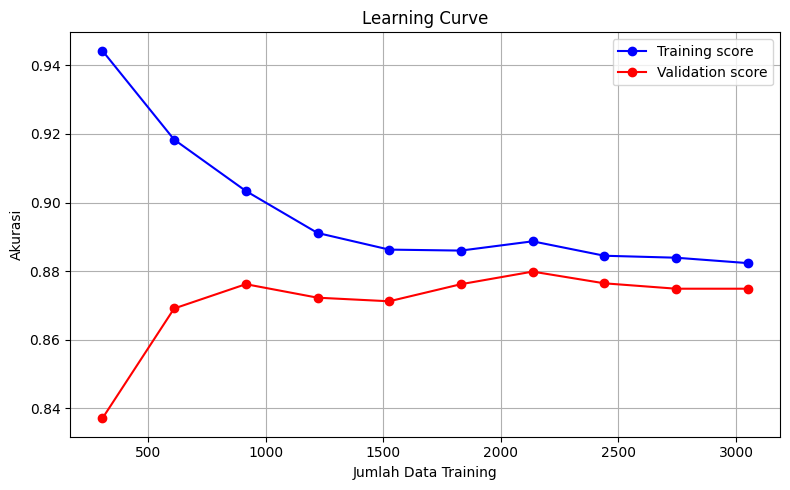

In [65]:
from sklearn.metrics import accuracy_score

# Training accuracy
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Akurasi Training: {train_acc:.2f}")

# Test accuracy
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Akurasi Test: {test_acc:.2f}")

# Indikasi overfitting
if train_acc - test_acc > 0.1:
    print("Model kemungkinan overfitting (selisih akurasi > 0.1)")
else:
    print("Model tidak menunjukkan indikasi overfitting yang signifikan")


from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Jumlah Data Training')
plt.ylabel('Akurasi')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

In [66]:
# print(f'Akurasi: {accuracy:.2f}')
# print('Laporan Klasifikasi:')
# print(class_report)
# print('Matriks Konfusi:')
# print(conf_matrix)
# print(f"ROC AUC Score (RF + KMeans feature): {roc_auc:.2f}")

In [67]:
# from sklearn.preprocessing import MultiLabelBinarizer
# import joblib
# symptom_columns = [col for col in df.columns if 'Symptom' in col]

# symptom_lists = df[symptom_columns].apply(lambda row: [symptom for symptom in row if pd.notnull(symptom) and symptom != 'Unknown'], axis=1)

# mlb = MultiLabelBinarizer()
# mlb.fit(symptom_lists)

# joblib.dump(mlb, 'mlb.joblib')

## DEPLOYMENT

In [68]:
from joblib import dump

dump(model, 'diseaseprediction.joblib')

['diseaseprediction.joblib']

In [69]:
!ngrok config add-authtoken 2wptVOol1C3ftGxJ7p1ZTxtVJEt_6dkrYc4hrMPTfG8DaMgR3

Authtoken saved to configuration file: C:\Users\Mellafesa\AppData\Local/ngrok/ngrok.yml


In [70]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
import traceback

# Suppress warnings for cleaner display, especially during development
warnings.filterwarnings('ignore')

st.set_page_config(
    page_title="Dashboard Prediksi Penyakit",
    page_icon="🩺",
)
st.title("Aplikasi Prediksi Penyakit Berdasarkan Gejala")
st.write("Masukkan data gejala pasien untuk memprediksi kemungkinan penyakit.")

# --- Define Colors for Plots (consistent with dark theme) ---
DARK_BG_COLOR = '#2E2E2E'
LIGHT_TEXT_COLOR = '#EAEAEA'
OUTLINE_COLOR = '#777777'
GRID_COLOR = '#555555'
HEATMAP_LINE_COLOR = '#444444'

def process_model_probabilities(prob_output, n_classes, n_samples=None):
    """
    Processes the raw probability output from a model to ensure it's in a consistent 2D format.
    Handles cases where predict_proba might return 1D for binary classification or single samples.
    """
    try:
        probs = np.array(prob_output)
        if probs.ndim == 2:
            return probs
        elif probs.ndim == 1 and n_samples == 1:
            # For a single prediction, if 1D and binary, reshape to [[prob_class_0, prob_class_1]]
            if n_classes == 2 and probs.shape[0] == 1:
                return np.array([[1 - probs[0], probs[0]]])
            # If 1D and multi-class (less common), reshape to [[prob1, prob2, ...]]
            elif probs.shape[0] == n_classes:
                return probs.reshape(1, -1)
            else: # Fallback if dimensions don't match
                return np.ones((1, n_classes)) / n_classes if n_classes > 0 else np.array([])
        else:
            # Fallback for unexpected dimensions, return uniform probabilities
            return np.ones((n_samples if n_samples else 1, n_classes)) / n_classes if n_classes > 0 else np.array([])
    except Exception:
        # Catch any error during processing and return uniform probabilities as a safe default
        return np.ones((n_samples if n_samples else 1, n_classes)) / n_classes if n_classes > 0 else np.array([])


def process_model_predictions(pred_output):
    """
    Processes raw prediction output to ensure it's a flat 1D numpy array of class labels.
    """
    try:
        pred_output = np.array(pred_output)
        if pred_output.ndim == 1:
            return pred_output
        elif pred_output.ndim == 2 and pred_output.shape[1] == 1:
            return pred_output.flatten()
        elif pred_output.ndim == 2 and pred_output.shape[1] > 1:
            # For multi-class (e.g., one-hot encoded predictions), take argmax
            return np.argmax(pred_output, axis=1)
        elif np.isscalar(pred_output):
            return np.array([pred_output])
        return pred_output.flatten() # Ensure it's 1D
    except Exception:
        return np.array([]) # Return empty array on error

@st.cache_resource
def load_resources():
    """
    Loads all necessary data files and the trained model.
    Uses st.cache_resource for efficient loading across app runs.
    """
    model_res, df_res, desc_df_res, precaution_df_res, symptom_severity_df_res = None, None, None, None, None
    all_loaded_successfully = True
    try:
        model_res = joblib.load('diseaseprediction.joblib')
        df_res = pd.read_csv('dataset.csv')
        desc_df_res = pd.read_csv('symptom_Description.csv')
        precaution_df_res = pd.read_csv('symptom_precaution.csv')
    except FileNotFoundError:
        st.error("Satu atau lebih file data inti tidak ditemukan (diseaseprediction.joblib, dataset.csv, symptom_Description.csv, symptom_precaution.csv). Aplikasi tidak dapat berjalan.")
        all_loaded_successfully = False
    except Exception as e:
        st.error(f"Gagal memuat sumber daya inti: {e}. Aplikasi tidak dapat berjalan.")
        all_loaded_successfully = False

    try:
        symptom_severity_df_res = pd.read_csv('Symptom-severity.csv')
        symptom_severity_df_res.columns = [col.strip().lower() for col in symptom_severity_df_res.columns]
        if 'symptom' not in symptom_severity_df_res.columns or 'weight' not in symptom_severity_df_res.columns:
            st.warning("File 'Symptom-severity.csv' tidak memiliki kolom 'symptom' atau 'weight'. Skor keparahan tidak dapat dihitung/digunakan.")
            symptom_severity_df_res = None
        else:
            symptom_severity_df_res['symptom'] = symptom_severity_df_res['symptom'].astype(str).str.strip().str.lower().str.replace(' ', '_')
    except FileNotFoundError:
        st.warning("File 'Symptom-severity.csv' tidak ditemukan. Skor keparahan tidak akan dihitung/digunakan oleh model atau ditampilkan.")
        symptom_severity_df_res = None
    except Exception as e:
        st.warning(f"Gagal memuat 'Symptom-severity.csv': {e}. Skor keparahan tidak akan dihitung/digunakan atau ditampilkan.")
        symptom_severity_df_res = None

    return model_res, df_res, desc_df_res, precaution_df_res, symptom_severity_df_res, all_loaded_successfully

# --- Load Resources ---
model, df_orig, desc_df, precaution_df, symptom_severity_df, load_success = load_resources()

if not load_success or model is None or df_orig is None or desc_df is None or precaution_df is None:
    st.error("Pemuatan sumber daya inti gagal. Aplikasi tidak dapat melanjutkan.")
    st.stop()

# --- Data Preprocessing (as done during model training) ---
# Create a copy to avoid modifying the original loaded DataFrame
df = df_orig.copy()

# Drop unnecessary symptom columns if they exist in the dataset
cols_to_drop = ['Symptom_12','Symptom_13','Symptom_14','Symptom_15','Symptom_16','Symptom_17']
for col in cols_to_drop:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

SYMPTOM_PLACEHOLDER = 'unknown_symptom_placeholder'
symptom_string_cols = [col for col in df.columns if 'Symptom' in col and col != 'severity_score']

# Normalize and encode string symptoms in the training data
for col in symptom_string_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower().str.replace(' ', '_')
        # Replace empty strings, 'nan', 'none', 'null' with a consistent placeholder
        df[col] = df[col].replace(['nan', '', 'none', 'null'], SYMPTOM_PLACEHOLDER)

# Prepare symptom encoder based on all possible symptom values encountered in the dataset
all_symptom_values_for_encoder = [SYMPTOM_PLACEHOLDER]
for col in symptom_string_cols:
    if col in df.columns:
        all_symptom_values_for_encoder.extend(df[col].unique())
unique_symptom_encoder_values = sorted(list(set(all_symptom_values_for_encoder)))
symptom_encoder = LabelEncoder()
symptom_encoder.fit(unique_symptom_encoder_values)
symptom_mapping = dict(zip(symptom_encoder.classes_, symptom_encoder.transform(symptom_encoder.classes_)))

# Encode symptoms to numerical values for the training data
for col in symptom_string_cols:
    if col in df.columns:
        df[col] = df[col].map(symptom_mapping).fillna(symptom_mapping.get(SYMPTOM_PLACEHOLDER, 0))

# Prepare list of symptoms for the Streamlit multiselect (using original string format for display)
symptoms_for_multiselect_set = set()
for col in symptom_string_cols:
    if col in df_orig.columns: # Use df_orig to get original symptom strings before encoding
        original_symptoms_in_col = df_orig[col].astype(str).str.strip().str.lower().str.replace(' ', '_').unique()
        symptoms_for_multiselect_set.update(s for s in original_symptoms_in_col if s not in ['nan', '', 'none', 'null', SYMPTOM_PLACEHOLDER])
available_symptoms_for_multiselect = sorted(list(symptoms_for_multiselect_set))

# Initialize weights dictionary for severity calculation
weights_dict = {}
if symptom_severity_df is not None:
    weights_dict = symptom_severity_df.set_index('symptom')['weight'].to_dict()

def calculate_df_severity(row, symptom_cols_list, current_weights_dict, s_mapping):
    """Calculates severity score for a row of symptoms (assumes symptoms are encoded)."""
    score = 0
    for col_name in symptom_cols_list:
        if col_name in row:
            symptom_key_encoded = row[col_name]
            # Reverse map encoded value to original string for weight lookup
            symptom_str = next((k for k, v in s_mapping.items() if v == symptom_key_encoded), SYMPTOM_PLACEHOLDER)
            if symptom_str != SYMPTOM_PLACEHOLDER:
                score += current_weights_dict.get(symptom_str, 0)
    return score

severity_q1_threshold = 0
severity_q2_threshold = 0

# Calculate severity score for the main DataFrame and determine thresholds
if symptom_severity_df is not None and weights_dict:
    df['severity_score'] = df.apply(lambda row: calculate_df_severity(row, symptom_string_cols, weights_dict, symptom_mapping), axis=1)
    if not df['severity_score'].empty and df['severity_score'].sum() > 0:
        if df['severity_score'].nunique() > 1:
            severity_q1_threshold = df['severity_score'].quantile(0.33)
            severity_q2_threshold = df['severity_score'].quantile(0.66)
            # Adjust thresholds if they are too close or identical
            if severity_q1_threshold == severity_q2_threshold:
                max_score_in_df = df['severity_score'].max()
                if max_score_in_df > 0:
                    severity_q1_threshold = max_score_in_df / 3
                    severity_q2_threshold = 2 * max_score_in_df / 3
                else: # All non-zero scores are identical
                    severity_q1_threshold = 1
                    severity_q2_threshold = 2
        elif df['severity_score'].nunique() == 1:
            unique_score = df['severity_score'].iloc[0]
            if unique_score > 0:
                severity_q1_threshold = unique_score / 3
                severity_q2_threshold = 2 * unique_score / 3
            else: # Single unique score is 0
                severity_q1_threshold = 1
                severity_q2_threshold = 2
    else: # Empty or all zero severity scores
        df['severity_score'] = 0
        st.warning("Kolom 'severity_score' kosong atau semua nol setelah kalkulasi. Menggunakan nilai default.")
        severity_q1_threshold = 1
        severity_q2_threshold = 2
else: # Symptom severity data not available
    df['severity_score'] = 0
    st.warning("Data keparahan gejala (Symptom-severity.csv) tidak tersedia atau kosong. 'severity_score' diatur ke 0.")
    severity_q1_threshold = 1
    severity_q2_threshold = 2

def categorize_severity(score, q1, q2):
    """Categorizes severity score into 'Rendah', 'Sedang', or 'Tinggi'."""
    if score <= q1:
        return "Rendah"
    elif score <= q2:
        return "Sedang"
    else:
        return "Tinggi"

# Ensure 'Disease' column exists before proceeding
if 'Disease' not in df.columns:
    st.error("Kolom target 'Disease' tidak ditemukan dalam dataset. Tidak dapat melanjutkan.")
    st.stop()

# --- KMeans Clustering for Training Data ---
# KMeans needs to be fit on the *same features* that will be used for prediction.
# Make sure 'cluster' is not in X_for_cluster initially, as it's the output.
cluster_features = [col for col in df.columns if col not in ['Disease', 'cluster']]
X_for_cluster = df[cluster_features].copy()

# Fit KMeans model (ensure n_init is set for newer scikit-learn versions)
try:
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_for_cluster)
    df['cluster'] = clusters
except Exception as e_kmeans:
    st.error(f"Gagal melakukan KMeans clustering: {e_kmeans}. Memastikan 'cluster' ditambahkan sebagai fitur dummy jika diperlukan.")
    df['cluster'] = 0 # Fallback if KMeans fails or if X_for_cluster is empty/invalid

# --- Prepare Data for Model Training and Prediction ---
X = df.drop('Disease', axis=1).copy()
y_series = df['Disease']
disease_encoder = LabelEncoder()
y = disease_encoder.fit_transform(y_series)
n_classes = len(disease_encoder.classes_)
if n_classes == 0:
    st.error("Tidak ada kelas penyakit yang terdeteksi setelah encoding. Periksa kolom 'Disease' Anda.")
    st.stop()

# Store expected feature order for consistency in user input for the model
expected_model_features = list(X.columns)

# --- Train-Test Split for Model Evaluation ---
if X.empty or len(y) == 0:
    st.warning("Tidak cukup data untuk train-test split dan evaluasi model.")
    X_train, X_test, y_train, y_test = pd.DataFrame(), pd.DataFrame(), np.array([]), np.array([])
else:
    try:
        # Ensure y is suitable for stratification (at least 2 samples per class)
        unique_classes, counts = np.unique(y, return_counts=True)
        if len(unique_classes) > 1 and all(c > 1 for c in counts):
            stratify_y = y
        else:
            stratify_y = None # Cannot stratify if any class has only one member

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=stratify_y)
    except ValueError as e_split:
        st.warning(f"Gagal melakukan stratified split ({e_split}). Melakukan split standar.")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    except Exception as e_split_gen:
        st.warning(f"Gagal melakukan train-test split: {e_split_gen}. Melakukan split standar.")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 🧪 Evaluasi Model Penyakit

if X_test.empty or len(y_test) == 0:
    st.info("Evaluasi model tidak dapat dilakukan karena tidak ada data test yang cukup.")
else:
    try:
        pred_raw = model.predict(X_test)
        y_pred = process_model_predictions(pred_raw)

        if not isinstance(y_pred, np.ndarray) or y_pred.ndim != 1 or (len(y_test) > 0 and len(y_pred) != len(y_test)):
            st.error(f"Output y_pred tidak valid. Shape: {getattr(y_pred, 'shape', 'N/A')}. Gagal menghitung metrik.")
            y_pred = np.array([-1] * len(y_test)) if len(y_test) > 0 else np.array([]) # Fallback for metrics

        prob_raw = model.predict_proba(X_test)
        y_prob = process_model_probabilities(prob_raw, n_classes, len(X_test))

        accuracy = 0.0
        precision = 0.0
        recall = 0.0

        if len(y_pred) == len(y_test) and len(y_test) > 0 and n_classes > 0:
            accuracy = accuracy_score(y_test, y_pred)
            # Use 'labels' parameter with unique labels present in y_true or y_pred for robust metric calculation
            unique_y_test_pred = np.unique(np.concatenate((y_test, y_pred)))
            precision = precision_score(y_test, y_pred, average='macro', zero_division=0, labels=unique_y_test_pred)
            recall = recall_score(y_test, y_pred, average='macro', zero_division=0, labels=unique_y_test_pred)

        cm = confusion_matrix(y_test, y_pred, labels=range(n_classes)) if len(y_pred) == len(y_test) and len(y_test) > 0 else np.array([[0]*n_classes]*n_classes)

        auc_score = 0.0
        can_calc_auc = isinstance(y_prob, np.ndarray) and y_prob.ndim == 2 and y_prob.shape[0] == len(y_test) and y_prob.shape[1] == n_classes and len(np.unique(y_test)) > 1

        if can_calc_auc:
            try:
                y_bin = label_binarize(y_test, classes=range(n_classes))
                if n_classes == 2:
                    auc_score = roc_auc_score(y_test, y_prob[:, 1])
                elif y_bin.shape[1] == n_classes:
                    auc_score = roc_auc_score(y_bin, y_prob, multi_class='ovr', average='macro')
            except ValueError:
                st.warning("ROC AUC calculation failed due to ValueError (e.g., single class present in test set). Skipping ROC AUC.")
            except Exception as e_auc:
                st.warning(f"ROC AUC calculation failed: {e_auc}. Skipping ROC AUC.")

        # --- Display Metrics ---
        row1_col1, row1_col2 = st.columns(2)
        with row1_col1:
            st.metric("Classes", f"{n_classes}")
        with row1_col2:
            st.metric("Test Samples", f"{len(y_test)}")

        row2_col1, row2_col2, row2_col3, row2_col4 = st.columns(4)
        with row2_col1:
            st.metric("Accuracy", f"{accuracy:.2f}")
        with row2_col2:
            st.metric("Precision", f"{precision:.2f}")
        with row2_col3:
            st.metric("Recall", f"{recall:.2f}")
        with row2_col4:
            st.metric("ROC AUC", f"{auc_score:.2f}" if auc_score > 0 else "N/A")

        # --- Visualization Options ---
        viz_option = st.selectbox("Pilih visualisasi:", ["Tidak Ada", "ROC Curve", "Confusion Matrix"])

        target_names_str = [str(cls_name) for cls_name in disease_encoder.classes_]

        if viz_option == "ROC Curve" and can_calc_auc and auc_score > 0:
            st.subheader("Kurva ROC (One-vs-Rest)")
            fig_roc, ax_roc = plt.subplots(figsize=(10, 8))
            fig_roc.set_facecolor(DARK_BG_COLOR)
            ax_roc.set_facecolor(DARK_BG_COLOR)

            for spine in ax_roc.spines.values():
                spine.set_edgecolor(OUTLINE_COLOR)

            ax_roc.tick_params(colors=LIGHT_TEXT_COLOR, which='both')

            y_bin_roc = label_binarize(y_test, classes=range(n_classes))

            if n_classes == 2:
                fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
                ax_roc.plot(fpr, tpr, label=f'{target_names_str[1]} (AUC = {auc_score:.2f})', linewidth=2)
            elif y_bin_roc.shape[1] == n_classes:
                for i in range(n_classes):
                    if i < len(target_names_str):
                        try:
                            if i in np.unique(y_test): # Plot only if class is present in y_test
                                fpr, tpr, _ = roc_curve(y_bin_roc[:, i], y_prob[:, i])
                                auc_val_class = roc_auc_score(y_bin_roc[:, i], y_prob[:, i])
                                ax_roc.plot(fpr, tpr, label=f'{target_names_str[i]} (AUC = {auc_val_class:.2f})', linewidth=2)
                        except ValueError:
                            pass # Skip if ROC cannot be calculated for this class

            ax_roc.plot([0, 1], [0, 1], linestyle='--', color=OUTLINE_COLOR, linewidth=1.5)

            legend_fontsize = 'x-small' if n_classes > 5 else None
            legend_roc = ax_roc.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=legend_fontsize,
                                       facecolor=DARK_BG_COLOR, edgecolor=OUTLINE_COLOR)
            for text in legend_roc.get_texts():
                text.set_color(LIGHT_TEXT_COLOR)
            if legend_roc.get_title():
                legend_roc.get_title().set_color(LIGHT_TEXT_COLOR)

            ax_roc.set_title('Kurva ROC (One-vs-Rest)', fontsize=15, color=LIGHT_TEXT_COLOR)
            ax_roc.set_xlabel('False Positive Rate', fontsize=12, color=LIGHT_TEXT_COLOR)
            ax_roc.set_ylabel('True Positive Rate', fontsize=12, color=LIGHT_TEXT_COLOR)
            ax_roc.grid(True, alpha=0.3, color=GRID_COLOR)
            st.pyplot(fig_roc)
            plt.close(fig_roc)

        elif viz_option == "Confusion Matrix":
            st.subheader("Confusion Matrix")
            fig_cm, ax_cm = plt.subplots(figsize=(max(8, n_classes*0.7), max(6, n_classes*0.6)))
            fig_cm.set_facecolor(DARK_BG_COLOR)

            sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', ax=ax_cm,
                        xticklabels=target_names_str, yticklabels=target_names_str,
                        linewidths=.5, linecolor=HEATMAP_LINE_COLOR,
                        annot_kws={"size": 10 if n_classes < 10 else 8, "color": "black"})

            for spine in ax_cm.spines.values():
                spine.set_edgecolor(OUTLINE_COLOR)

            ax_cm.set_title('Confusion Matrix', fontsize=15, color=LIGHT_TEXT_COLOR)
            ax_cm.set_xlabel('Prediksi Label', fontsize=12, color=LIGHT_TEXT_COLOR)
            ax_cm.set_ylabel('Label Sebenarnya', fontsize=12, color=LIGHT_TEXT_COLOR)

            ax_cm.tick_params(axis='x', colors=LIGHT_TEXT_COLOR)
            ax_cm.tick_params(axis='y', colors=LIGHT_TEXT_COLOR)
            plt.xticks(rotation=45, ha='right', fontsize=10, color=LIGHT_TEXT_COLOR)
            plt.yticks(rotation=0, fontsize=10, color=LIGHT_TEXT_COLOR)

            if hasattr(ax_cm.collections[0], 'colorbar') and ax_cm.collections[0].colorbar is not None:
                cbar = ax_cm.collections[0].colorbar
                cbar.ax.tick_params(colors=LIGHT_TEXT_COLOR)

            plt.tight_layout(pad=1.5)
            st.pyplot(fig_cm)
            plt.close(fig_cm)

    except Exception as e_eval:
        st.error(f"Gagal melakukan evaluasi model: {e_eval}")
        st.error(traceback.format_exc())


## 🔍 Prediksi Penyakit

with st.form("prediction_form"):
    selected_symptoms_raw = st.multiselect(
        "Pilih gejala yang dialami:",
        options=available_symptoms_for_multiselect,
        help="Pilih satu atau lebih gejala dari daftar"
    )
    predict_btn = st.form_submit_button("🧠 Prediksi Penyakit", use_container_width=True)

if predict_btn:
    if selected_symptoms_raw:
        try:
            # 1. Initialize user input data with placeholder for all symptom columns
            # This ensures all symptom columns expected by the model are present and
            # initially set to represent an 'absent' symptom.
            user_input_data = {}
            for feature_col in expected_model_features:
                if 'Symptom_' in feature_col:
                    user_input_data[feature_col] = symptom_mapping.get(SYMPTOM_PLACEHOLDER, 0)
                elif feature_col == 'severity_score' or feature_col == 'cluster':
                    user_input_data[feature_col] = 0 # Default numerical value
                else:
                    user_input_data[feature_col] = 0 # Fallback for any other unexpected numerical features

            # 2. Fill the symptom columns based on user's selected symptoms by finding available slots.
            # This is the critical change to ensure order-independence.
            filled_symptom_cols_count = 0
            for symptom_str in selected_symptoms_raw:
                # Find an available Symptom_X column (one that currently holds the placeholder value)
                found_slot = False
                for col_name in symptom_string_cols:
                    if user_input_data.get(col_name) == symptom_mapping.get(SYMPTOM_PLACEHOLDER, 0):
                        user_input_data[col_name] = symptom_mapping.get(symptom_str, symptom_mapping[SYMPTOM_PLACEHOLDER])
                        found_slot = True
                        filled_symptom_cols_count += 1
                        break # Move to the next selected symptom
                if not found_slot:
                    st.warning(f"Semua kolom gejala telah diisi. Gejala '{symptom_str}' mungkin diabaikan karena tidak ada slot kosong. Jumlah gejala yang dipilih melebihi yang dapat ditampung model.")
                    break # Move to the next selected symptom
                if not found_slot:
                    st.warning(f"Semua kolom gejala telah diisi. Gejala '{symptom_str}' mungkin diabaikan karena tidak ada slot kosong. Jumlah gejala yang dipilih melebihi yang dapat ditampung model.")
                    break # Stop if all symptom columns are filled

            # 3. Calculate severity_score based on the original string symptoms selected by the user
            current_user_severity_score = 0
            if symptom_severity_df is not None and weights_dict:
                for symptom_name_str in selected_symptoms_raw:
                    current_user_severity_score += weights_dict.get(symptom_name_str, 0)
            user_input_data['severity_score'] = current_user_severity_score

            # 4. Create the DataFrame for prediction, ensuring all expected_model_features are present
            user_df = pd.DataFrame([user_input_data], columns=expected_model_features)

            # 5. Calculate user cluster (if 'cluster' is an expected feature by the model)
            if 'cluster' in expected_model_features:
                features_for_user_cluster = user_df.drop(columns=['cluster'], errors='ignore')
                if not X_for_cluster.empty and kmeans: # Ensure KMeans was fitted and not empty
                    try:
                        user_cluster = kmeans.predict(features_for_user_cluster)
                        user_df['cluster'] = user_cluster[0]
                    except Exception as e_kmeans_predict:
                        st.warning(f"Gagal memprediksi cluster untuk input pengguna: {e_kmeans_predict}. Menggunakan cluster default (0).")
                        user_df['cluster'] = 0
                else:
                    user_df['cluster'] = 0 # Default if KMeans wasn't properly fitted or X_for_cluster is empty

            # 6. Make prediction using the model
            prob_raw_user = model.predict_proba(user_df)
            probabilities = process_model_probabilities(prob_raw_user, n_classes, 1)

            if probabilities is not None and probabilities.ndim == 2 and probabilities.shape[1] == n_classes:
                predicted_idx = np.argmax(probabilities)
                confidence = probabilities[0, predicted_idx]
                disease_name = disease_encoder.inverse_transform([predicted_idx])[0]

                st.success("### 📋 Hasil Prediksi")
                col1_res, col2_res = st.columns([2,1])
                with col1_res: st.markdown(f"**Penyakit:** <span style='font-size: 1.2em; color: #28a745;'>**{str(disease_name).strip()}**</span>", unsafe_allow_html=True)
                with col2_res: st.markdown(f"**Keyakinan:** <span style='font-size: 1.2em;'>{confidence:.1%}</span>", unsafe_allow_html=True)
                st.markdown("---")

                if desc_df is not None:
                    desc_row = desc_df[desc_df['Disease'].str.strip().str.lower() == str(disease_name).strip().lower()]
                    if not desc_row.empty: st.info(f"**📖 Deskripsi:** {desc_row['Description'].values[0]}")
                    else: st.caption(f"Deskripsi tidak tersedia untuk '{str(disease_name).strip()}'.")

                if precaution_df is not None:
                    precaution_row = precaution_df[precaution_df['Disease'].str.strip().str.lower() == str(disease_name).strip().lower()]
                    if not precaution_row.empty:
                        precautions = [str(p).strip() for p in precaution_row.iloc[0, 1:].values if pd.notna(p) and str(p).strip().lower() not in ['nan', '']]
                        if precautions:
                            st.warning("**🛡️ Tindakan Pencegahan & Saran:**")
                            for i, p_text in enumerate(precautions, 1): st.write(f"{i}. {p_text}")
                        else: st.caption(f"Tindakan pencegahan tidak spesifik atau tidak tersedia untuk '{str(disease_name).strip()}'.")
                    else: st.caption(f"Informasi tindakan pencegahan tidak ditemukan untuk '{str(disease_name).strip()}'.")

                st.markdown("---")

                if probabilities is not None and probabilities.shape[1] > 1:
                    st.markdown("### 📊 Top 5 Kemungkinan Diagnosis")
                    top_indices = np.argsort(probabilities[0])[::-1][:min(5, n_classes)]
                    top_diseases = disease_encoder.inverse_transform(top_indices)
                    top_probs = probabilities[0, top_indices]

                    results_data = {'Penyakit': [str(d).strip() for d in top_diseases], 'Probabilitas': top_probs}
                    results_df = pd.DataFrame(results_data)

                    chart_data = results_df.set_index('Penyakit')
                    st.bar_chart(chart_data, height=300)
                    st.dataframe(results_df.style.format({'Probabilitas': '{:.1%}'}), use_container_width=True, hide_index=True)

                if symptom_severity_df is not None and weights_dict:
                    severity_category = categorize_severity(current_user_severity_score, severity_q1_threshold, severity_q2_threshold)
                    st.info(f"ℹ️ **Total Skor Keparahan Gejala (berdasarkan input):** {current_user_severity_score} (Kategori: **{severity_category}**).\n\nAmbang batas kategori: Rendah ≤ {severity_q1_threshold:.1f}, Sedang ≤ {severity_q2_threshold:.1f}, Tinggi > {severity_q2_threshold:.1f}. Skor ini adalah salah satu dari berbagai faktor yang dipertimbangkan model.")
                else:
                    st.info("ℹ️ Skor keparahan gejala tidak dapat dihitung (data 'Symptom-severity.csv' tidak tersedia atau kosong), sehingga kategori tidak dapat ditentukan.")

            else:
                st.error("Tidak dapat menghitung probabilitas prediksi. Model mungkin tidak mengembalikan output yang diharapkan atau jumlah kelas tidak sesuai.")

        except KeyError as e_key:
            st.error(f"Terjadi kesalahan pemetaan fitur (KeyError): '{e_key}'. Ini mungkin bug internal atau ketidaksesuaian data/kolom.")
            st.error(traceback.format_exc())
        except ValueError as e_val:
            st.error(f"Terjadi kesalahan dalam pemrosesan input atau prediksi (ValueError): {e_val}.")
            st.error(traceback.format_exc())
        except Exception as e_pred:
            st.error(f"Terjadi kesalahan umum saat memproses prediksi: {e_pred}")
            st.error(traceback.format_exc())

    else:
        st.warning("⚠️ Silakan pilih minimal satu gejala untuk melakukan prediksi.")

st.markdown("---")
st.caption("⚕️ *Aplikasi ini untuk tujuan informasi dan edukasi saja. Selalu konsultasikan dengan profesional medis atau dokter untuk diagnosis dan perawatan yang akurat.*")

Overwriting app.py


In [71]:
from pyngrok import ngrok
import threading
import time
import os

In [72]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8502")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8502)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://c01c-103-233-100-202.ngrok-free.app" -> "http://localhost:8502"
